# EAST

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

In [3]:
def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt' and 'nalyers1' in file and 'acc' in file and 'nhid25' in file:
                L.append(os.path.join(file))
    return L
file_name('../data/hwdb_classIL_sgd_nhid2000_lr0005')

[]

# Single-head experiments

## HWDB

### 10 classes

[0.         0.025      0.00555999 0.18879244 0.1462386  0.11342262
 0.09553823 0.05935347 0.12158095 0.09324795]


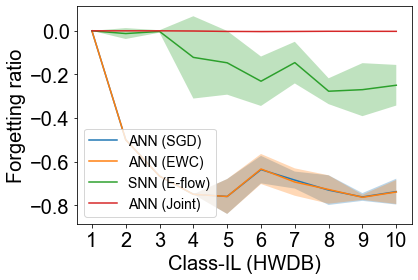

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline


class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
                x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    xx = np.zeros((n_seed, task))
    xx_mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
            xx[i, rho] = nnn[i][rho, rho]
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            xx_mean[j, k] = xx[j, :k+1].mean()
    mean = mean / xx_mean - 1
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    plt.plot(output.mean(0), label=label)
    if 'edf' in root:
        print(output.std(0)) 
    lambda_std = 1
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), (output.mean(0) + lambda_std * output.std(0)), alpha=.3)
    global task
    task = output.shape[1]

plot('../data/hwdb_classIL_sgd/',['20210619162551_SingleHead_acc_seed_0.txt',
                        '20210619162609_SingleHead_acc_seed_1.txt',
                        '20210619162617_SingleHead_acc_seed_4.txt',
                        '20210619162624_SingleHead_acc_seed_100.txt',
                        '20210619162636_SingleHead_acc_seed_1300.txt'],'ANN (SGD)')
plot('../data/hwdb_classIL_ewc/',['20210619164226_SingleHead_acc_seed_0.txt',
                        '20210619164226_SingleHead_acc_seed_1.txt',
                        '20210619164226_SingleHead_acc_seed_100.txt',
                        '20210619164226_SingleHead_acc_seed_1300.txt',
                        '20210619164226_SingleHead_acc_seed_4.txt'],'ANN (EWC)')
plot('../data/hwdb_classIL_edfsnn/',['20210619160520_SingleHead_acc_seed_0.txt',
                        '20210619160750_SingleHead_acc_seed_1.txt',
                        '20210619160757_SingleHead_acc_seed_4.txt',
                        '20210619160805_SingleHead_acc_seed_100.txt',
                        '20210619160813_SingleHead_acc_seed_1300.txt'],'SNN (E-flow)')
plot('../data/hwdb_classIL_joint/',['20210619165741_SingleHead_acc_seed_0.txt',
                        '20210619165741_SingleHead_acc_seed_1.txt',
                        '20210619165741_SingleHead_acc_seed_100.txt',
                        '20210619165741_SingleHead_acc_seed_1300.txt',
                        '20210619165741_SingleHead_acc_seed_4.txt'],'ANN (Joint)')
plt.legend(fontsize=14,loc='lower left')
n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Class-IL (HWDB)', fontsize=20)
plt.ylabel('Forgetting ratio', fontsize=20)
plt.show()

### 100 classes

0.25
[0.33744201 0.30641201 0.29663199 0.329739   0.23671199]
ANN (SGD) 100 0.49100381666421883 0.04791162726430398
0.25
[0.32583401 0.33960399 0.234898   0.298646   0.294186  ]
ANN (EWC) 100 0.4921766127943993 0.04778512343307543
0.3333333333333333
[0.86771411 0.78625399 0.68250006 0.76416802]
ANN (E-flow) 100 0.8955529819428921 0.025191012010253547
seed_0.max 160 len 159
seed_1.max 160 len 160
seed_4.max 160 len 160
seed_100.max 160 len 158
seed_1300.max 160 len 160
0.25
[0.990644 0.995299 0.99228  0.992956 0.992802]
ANN (Joint) 100 0.9946609866421877 0.0003358154515823153


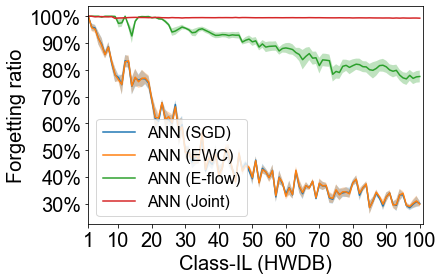

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

def file_name_joint(file_dir, a):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if a in file:
                L.append(os.path.join(file))
    return L
def read_split_joint(root,seed='seed_0.txt'):
    L = file_name_joint(root, seed)
    a = []
    for i in range(len(L)):
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        a.append(index)
    print('max',max(a),'len',len(a))
    x = np.zeros((1000,1000))
    for i in range(len(L)):
        full = []
        f = open(root+'/'+L[i], 'r').readlines()
        for j in range(len(f)):
            full.append(float(f[j]))
        full = np.array(full)
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        x[index-1,:index] = full
    x = x[:xlim_max,:xlim_max]
    return x

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    x_ = x_[:xlim_max,:xlim_max]
    return x_

def plot(root, name,label):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    plt.plot(output.mean(0), label=label)
    lambda_std = 1/(output.shape[0]-1)
    print(lambda_std)
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), (output.mean(0) + lambda_std * output.std(0)), alpha=.3)
    print(output[:,-1])
    print(label, output.shape[1] ,output.mean(0).mean(), lambda_std*output.mean(0).std())
    global task
    task = output.shape[1]

    
colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

xlim_max = 100
plot('../data/hwdb_classIL_sgd_nhid2000_lr0005',
                 ['20210630181503_nhid2000_nalyers1_acc_seed_100.txt',
                 '20210630181503_nhid2000_nalyers1_acc_seed_1300.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_0.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_1.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_4.txt'],'ANN (SGD)')
plot('../data/hwdb_classIL_ewc_nhid2000_lr0005',
                 ['20210630202923_nhid2000_nalyers1_acc_seed_1.txt',
                 '20210630202923_nhid2000_nalyers1_acc_seed_100.txt',
                 '20210630214418_nhid2000_nalyers1_acc_seed_4.txt',
                 '20210630214420_nhid2000_nalyers1_acc_seed_0.txt',
                 '20210630214421_nhid2000_nalyers1_acc_seed_1300.txt'],'ANN (EWC)')
plot('../data/hwdb_classIL_edfsnn_nhid2000_lr0005',
                 [
                 '20210630181506_nhid2000_nalyers1_acc_seed_4.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_1300.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_2.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_200.txt'
                 ],'ANN (E-flow)')
plot('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],'ANN (Joint)')
plt.legend(fontsize=16,loc='lower left')
plt.xticks([0,9,19,29,39,49,59,69,79,89,99],[1,10,20,30,40,50,60,70,80,90,100], fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('Class-IL (HWDB)', fontsize=20)
plt.ylabel('Forgetting ratio', fontsize=20)
plt.xlim([0,xlim_max])
plt.savefig('C:\code\EDF图\incremental/increment_hwdb.svg')
plt.show()

### backward in different time

0.25
[-0.29791003 -0.11042005 -0.03959    -0.22292    -0.00416005]
t=20 10 -0.1350000262260437 0.027635109285618287
0.25
[-0.32291996 -0.20833004 -0.22500002 -0.31667     0.        ]
t=bp 10 -0.2145840048789978 0.029230149559201175
0.25
[-0.10000002 -0.12291002  0.          0.         -0.24583   ]
t=-1 10 -0.09374800920486451 0.022802363072691494


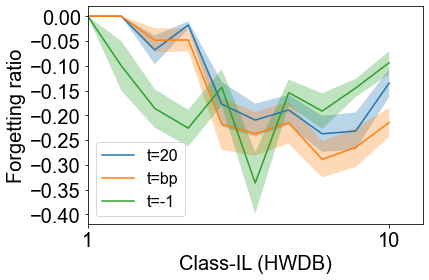

In [241]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

def file_name_joint(file_dir, a):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if a in file:
                L.append(os.path.join(file))
    return L
def read_split_joint(root,seed='seed_0.txt'):
    L = file_name_joint(root, seed)
    a = []
    for i in range(len(L)):
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        a.append(index)
    print('max',max(a),'len',len(a))
    x = np.zeros((1000,1000))
    for i in range(len(L)):
        full = []
        f = open(root+'/'+L[i], 'r').readlines()
        for j in range(len(f)):
            full.append(float(f[j]))
        full = np.array(full)
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        x[index-1,:index] = full
    x = x[:xlim_max,:xlim_max]
    return x

class Get_name():
    def __init__(self, sheet):
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
                # if root not in L: L.append(root)
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    xx = np.zeros((n_seed, task))
    xx_mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
            xx[i, rho] = nnn[i][rho, rho]
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            xx_mean[j, k] = xx[j, :k+1].mean()
    mean = mean / xx_mean - 1
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    x_ = x_[:xlim_max,:xlim_max]
    return x_

def plot(root, name,label):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
#     print(output)
    plt.plot(output.mean(0), label=label)
    lambda_std = 1/(output.shape[0]-1)
    print(lambda_std)
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), (output.mean(0) + lambda_std * output.std(0)), alpha=.3)
    print(output[:,-1])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    global task
    task = output.shape[1]

    
colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

xlim_max = 10
plot('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_t20_1',
                 ['20210712163815_nhid100_nalyers1_acc_seed_0.txt',
 '20210712163955_nhid100_nalyers1_acc_seed_1.txt',
 '20210712164002_nhid100_nalyers1_acc_seed_4.txt',
 '20210712164009_nhid100_nalyers1_acc_seed_100.txt',
 '20210712164014_nhid100_nalyers1_acc_seed_1300.txt'],'t=20')
plot('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_bp',
                 ['20210712203637_nhid100_nalyers1_acc_seed_0.txt',
 '20210712204310_nhid100_nalyers1_acc_seed_1.txt',
 '20210712204316_nhid100_nalyers1_acc_seed_4.txt',
 '20210712204324_nhid100_nalyers1_acc_seed_100.txt',
 '20210712204330_nhid100_nalyers1_acc_seed_1300.txt'],'t=bp')
plot('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_t-1_test',
                 ['20210712181633_nhid100_nalyers1_acc_seed_1300.txt',
 '20210712181639_nhid100_nalyers1_acc_seed_100.txt',
 '20210712181644_nhid100_nalyers1_acc_seed_4.txt',
 '20210712181651_nhid100_nalyers1_acc_seed_1.txt',
 '20210712181658_nhid100_nalyers1_acc_seed_0.txt'],'t=-1')

plt.legend(fontsize=16,loc='lower left')
plt.xticks([0,9,19,29,39,49,59,69,79,89,99],[1,10,20,30,40,50,60,70,80,90,100], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Class-IL (HWDB)', fontsize=20)
plt.ylabel('Forgetting ratio', fontsize=20)
plt.xlim([0,xlim_max])
plt.show()

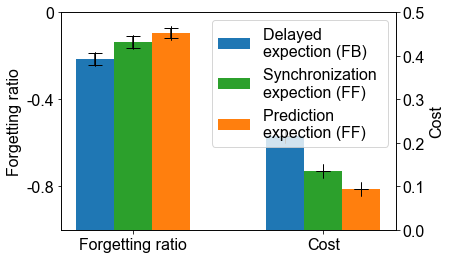

In [245]:
def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,-1]
    return sss

def ffff(root, name, xlim_max_=10):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], xlim_max_,'\t',end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    original_data = original_data[:,:xlim_max_,:xlim_max_]
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

bp = ffff('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_bp',
                 ['20210712203637_nhid100_nalyers1_acc_seed_0.txt',
 '20210712204310_nhid100_nalyers1_acc_seed_1.txt',
 '20210712204316_nhid100_nalyers1_acc_seed_4.txt',
 '20210712204324_nhid100_nalyers1_acc_seed_100.txt',
 '20210712204330_nhid100_nalyers1_acc_seed_1300.txt'])
standard = ffff('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_t20_1',
                 ['20210712163815_nhid100_nalyers1_acc_seed_0.txt',
 '20210712163955_nhid100_nalyers1_acc_seed_1.txt',
 '20210712164002_nhid100_nalyers1_acc_seed_4.txt',
 '20210712164009_nhid100_nalyers1_acc_seed_100.txt',
 '20210712164014_nhid100_nalyers1_acc_seed_1300.txt'])
prediction = ffff('../data/hwdb_不同t进行backward/hwdb_classIL_edfsnn_hwdb_t-1_test',
                 ['20210712181633_nhid100_nalyers1_acc_seed_1300.txt',
 '20210712181639_nhid100_nalyers1_acc_seed_100.txt',
 '20210712181644_nhid100_nalyers1_acc_seed_4.txt',
 '20210712181651_nhid100_nalyers1_acc_seed_1.txt',
 '20210712181658_nhid100_nalyers1_acc_seed_0.txt'])

from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

plt.rcParams['font.sans-serif'] = ['Arial']  
fig, ax1 = plt.subplots()
c = np.arange(4)
x = range(task)
edfsnn_list = [bp,standard, prediction]
label = ['Delayed \nexpection (FB)', 'Synchronization \nexpection (FF)', 'Prediction \nexpection (FF)']
color = ['C0','C2','C1']
cost = [1,1,1]
edfsnn = np.zeros((3,5))
for i in range(len(label)):
    edfsnn[i,:] = regression(x, edfsnn_list[i])
    ax1.bar(0.2*i, edfsnn.mean(1)[i]+1, width=0.2,color=color[i])
    lambda_std = 1/4
    ax1.errorbar(0.2*i,edfsnn.mean(1)[i]+1, fmt=" ", yerr=edfsnn.std(1)[i]*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.yticks([0.2,0.6,1],[-0.8,-0.4,0], fontsize=16)
plt.xticks(np.arange(2)+0.2,['Forgetting ratio', 'Cost'], fontsize=16)
plt.ylabel('Forgetting ratio',fontsize=16)
ax2 = ax1.twinx()
for i in range(len(label)):
    energy = -edfsnn.mean(1)[i]*cost[i]
    lambda_std = 1/4
    ax2.bar(1+0.2*i, energy, width=0.2,label=label[i],color=color[i])
    ax2.errorbar(1+0.2*i, energy, fmt=" ", yerr=0, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.ylim([0,0.5])
plt.legend(fontsize=16,loc='upper right',frameon=True)
plt.yticks(fontsize=16)
plt.xticks(np.arange(2)+0.2,['Forgetting ratio', 'Cost'], fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.savefig('C:\code\EDF图\incremental/DorSorP.svg')

## MNIST

ANN (SGD) 10 0.29536914944648746 0.06538923154401777
ANN (EWC) 10 0.29540536358952524 0.06538391797074213
SNN (E-flow) 10 0.8079739332199096 0.033390626755927896
ANN (Joint) 10 0.9893552410602569 0.001331424027067488


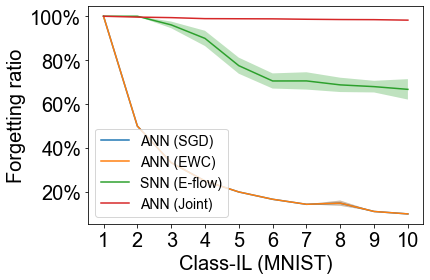

In [3]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def plot(root, name,label):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    plt.plot(output.mean(0), label=label)
    lambda_std = 1/(output.shape[0]-1)
    print(label, output.shape[1] ,output.mean(0).mean(), lambda_std*output.mean(0).std())
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), (output.mean(0) + lambda_std * output.std(0)), alpha=.3)
    global task
    task = output.shape[1]

plot('../data/mnist_classIL_sgd/1',['20210620000200_SingleHead_acc_seed_0.txt',
                         '20210620000200_SingleHead_acc_seed_1.txt',
                         '20210620000200_SingleHead_acc_seed_100.txt',
                         '20210620000200_SingleHead_acc_seed_1300.txt',
                         '20210620000200_SingleHead_acc_seed_4.txt',],'ANN (SGD)')
plot('../data/mnist_classIL_ewc/1',['20210620000437_SingleHead_acc_seed_0.txt',
                         '20210620000437_SingleHead_acc_seed_100.txt',
                         '20210620000437_SingleHead_acc_seed_4.txt',
                         '20210620000505_SingleHead_acc_seed_1.txt',
                         '20210620000505_SingleHead_acc_seed_1300.txt'],'ANN (EWC)')
plot('../data/mnist_classIL_edfsnn/sota/1',['20210714160426_nhid100_nalyers1_acc_seed_0.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_100.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_4.txt'],'SNN (E-flow)')
plot('../data/mnist_classIL_joint/1',['20210620001620_SingleHead_acc_seed_0.txt',
                         '20210620001620_SingleHead_acc_seed_100.txt',
                         '20210620001620_SingleHead_acc_seed_1300.txt',
                         '20210620001620_SingleHead_acc_seed_4.txt',
                         '20210620001632_SingleHead_acc_seed_1.txt'],'ANN (Joint)')
plt.legend(fontsize=14,loc='lower left')
n = 1
plt.xticks(np.arange(0, task, n),np.arange(1, task+1, n), fontsize=20)
plt.yticks(fontsize=20)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('Class-IL (MNIST)', fontsize=20)
plt.ylabel('Forgetting ratio', fontsize=20)
plt.savefig('C:\code\EDF图\incremental/increment_mnist.svg')
plt.show()

In [5]:
(12.93-1)/12.93

0.922660479505027

In [ ]:
plot('../data/mnist_classIL_edfsnn/sota/mnist_classIL_edfsnn_mnist_batch256',['20210714154749_nhid100_nalyers1_acc_seed_100.txt',
 '20210714154749_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714154750_nhid100_nalyers1_acc_seed_0.txt',
 '20210714154750_nhid100_nalyers1_acc_seed_1.txt',
 '20210714154750_nhid100_nalyers1_acc_seed_4.txt'],'SNN (E-flow)')

### backward in different t

0.25
[-0.30247003 -0.33122003 -0.56901997 -0.46171999 -0.204     ]
back 10 -0.37368600368499755 0.03193230290698059
0.25
[-0.23528999 -0.38928998 -0.67214    -0.19556999 -0.17214   ]
SNN (E-flow) 10 -0.33288599252700807 0.04643471617187977
0.25
[-0.21249998 -0.38136995 -0.65347999 -0.21028006 -0.19074994]
predict 10 -0.3296759843826294 0.043989679260557066


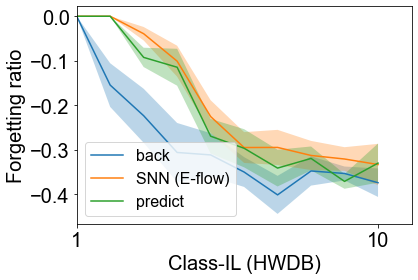

In [215]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

def file_name_joint(file_dir, a):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if a in file:
                L.append(os.path.join(file))
    return L
def read_split_joint(root,seed='seed_0.txt'):
    L = file_name_joint(root, seed)
    a = []
    for i in range(len(L)):
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        a.append(index)
    print('max',max(a),'len',len(a))
    x = np.zeros((1000,1000))
    for i in range(len(L)):
        full = []
        f = open(root+'/'+L[i], 'r').readlines()
        for j in range(len(f)):
            full.append(float(f[j]))
        full = np.array(full)
        index = int(L[i].split('class_')[-1].split('_acc')[0])
        x[index-1,:index] = full
    x = x[:xlim_max,:xlim_max]
    return x

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    xx = np.zeros((n_seed, task))
    xx_mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
            xx[i, rho] = nnn[i][rho, rho]
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            xx_mean[j, k] = xx[j, :k+1].mean()
    mean = mean / xx_mean - 1
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    x_ = x_[:xlim_max,:xlim_max]
    return x_

def plot(root, name,label):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    plt.plot(output.mean(0), label=label)
    lambda_std = 1/(output.shape[0]-1)
    print(lambda_std)
    plt.fill_between(range(output.shape[1]), (output.mean(0) - lambda_std * output.std(0)), (output.mean(0) + lambda_std * output.std(0)), alpha=.3)
    print(output[:,-1])
    print(label, output.shape[1] ,output.mean(0)[-1], lambda_std*output.std(0)[-1])
    global task
    task = output.shape[1]

    
colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

xlim_max = 10
plot('../data/hwdb_不同t进行backward\mnist\mnist_classIL_edfsnn_delay1',
                 ['20210714203425_nhid100_nalyers1_acc_seed_0.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_1.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_100.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_4.txt'],'back')
plot('../data/mnist_classIL_edfsnn/sota/1',['20210714160426_nhid100_nalyers1_acc_seed_0.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_100.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_4.txt'],'SNN (E-flow)')
plot('../data/hwdb_不同t进行backward\mnist\mnist_classIL_edfsnn_p01',
                 ['20210714195533_nhid100_nalyers1_acc_seed_0.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_1.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_100.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_4.txt'],'predict')

plt.legend(fontsize=16,loc='lower left')
plt.xticks([0,9,19,29,39,49,59,69,79,89,99],[1,10,20,30,40,50,60,70,80,90,100], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Class-IL (HWDB)', fontsize=20)
plt.ylabel('Forgetting ratio', fontsize=20)
plt.xlim([0,xlim_max])
plt.show()

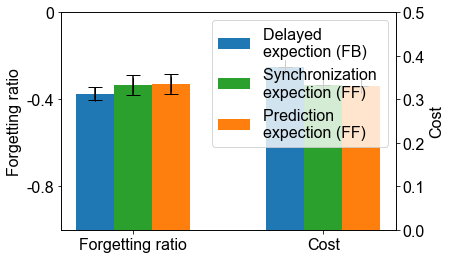

In [221]:
def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,-1]
    return sss

def ffff(root, name, xlim_max_=10):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], xlim_max_,'\t',end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    original_data = original_data[:,:xlim_max_,:xlim_max_]
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

bp = ffff('../data/hwdb_不同t进行backward\mnist\mnist_classIL_edfsnn_delay1',
                 ['20210714203425_nhid100_nalyers1_acc_seed_0.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_1.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_100.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714203425_nhid100_nalyers1_acc_seed_4.txt'])
standard = ffff('../data/mnist_classIL_edfsnn/sota/1',['20210714160426_nhid100_nalyers1_acc_seed_0.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_100.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_4.txt'])
prediction = ffff('../data/hwdb_不同t进行backward\mnist\mnist_classIL_edfsnn_p01',
                 ['20210714195533_nhid100_nalyers1_acc_seed_0.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_1.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_100.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714195533_nhid100_nalyers1_acc_seed_4.txt'])

from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

plt.rcParams['font.sans-serif'] = ['Arial']  
fig, ax1 = plt.subplots()
c = np.arange(4)
x = range(task)
edfsnn_list = [bp,standard, prediction]
label = ['Delayed \nexpection (FB)', 'Synchronization \nexpection (FF)', 'Prediction \nexpection (FF)']
color = ['C0','C2','C1']
cost = [1,1,1]
edfsnn = np.zeros((3,5))
for i in range(len(label)):
    edfsnn[i,:] = regression(x, edfsnn_list[i])
    ax1.bar(0.2*i, edfsnn.mean(1)[i]+1, width=0.2,color=color[i])
    lambda_std = 1/4
    ax1.errorbar(0.2*i,edfsnn.mean(1)[i]+1, fmt=" ", yerr=edfsnn.std(1)[i]*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.yticks([0.2,0.6,1],[-0.8,-0.4,0], fontsize=16)
plt.xticks(np.arange(2)+0.2,['Forgetting ratio', 'Cost'], fontsize=16)
plt.ylabel('Forgetting ratio',fontsize=16)
ax2 = ax1.twinx()
for i in range(len(label)):
    energy = -edfsnn.mean(1)[i]*cost[i]
    lambda_std = 1/4
    ax2.bar(1+0.2*i, energy, width=0.2,label=label[i],color=color[i])
    ax2.errorbar(1+0.2*i, energy, fmt=" ", yerr=0, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.ylim([0,0.5])
plt.legend(fontsize=16,loc='upper right',frameon=True)
plt.yticks(fontsize=16)
plt.xticks(np.arange(2)+0.2,['Forgetting ratio', 'Cost'], fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.savefig('C:\code\EDF图\incremental/DorSorP_mnist.svg')

# different numbers in hidden layers

## HWDB

seed_0. 50 	max 50 len 57
seed_1. 50 	max 50 len 53
seed_4. 50 	max 50 len 59
seed_100. 50 	max 50 len 61
seed_1300. 50 	max 50 len 58
seed_0. 50 	max 160 len 159
seed_1. 50 	max 160 len 160
seed_4. 50 	max 160 len 160
seed_100. 50 	max 160 len 158
seed_1300. 50 	max 160 len 160
seed_0. 50 	max 50 len 50
seed_1. 50 	max 50 len 50
seed_4. 50 	max 50 len 50
seed_100. 50 	max 50 len 50
seed_1300. 50 	max 50 len 50
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
N mean: [-0.65550741 -0.65472167 -0.62674419 -0.00433914]
N std: [0.00381986 0.00384136 0.00467875 0.00072217]
[0.25       0.25       0.33333333 0.25      ]
	SGD   EWC   Joint   EDF-SNN 
2N mean: [-0.50899618 -0.50782339 -0.10444702 -0.00469559]
2N std: [0.00617799 0.00605544 0.01271043 0.00088906]
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
3N mean: [-0.41076104 -0.41061015 -0.09286959 -0.00423292]
3N std: [0.00439525 0.0039796  0.01103364 0.00068292]


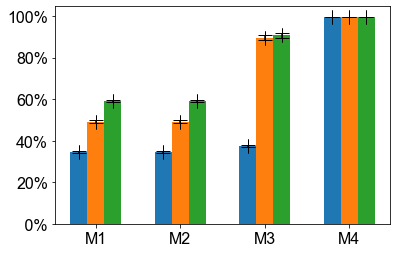

In [10]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['C0','C1','C2','C3','C4','C5']
plt.rcParams['font.sans-serif'] = ['Arial']  
def ffff(root, name, xlim_max_=100):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], xlim_max_,'\t',end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    original_data = original_data[:,:xlim_max_,:xlim_max_]
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']

sgd_p1 = ffff('../data/hwdb_classIL_sgd_nhid1000_lr0005/',['20210703231004_nhid1000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_4.txt'])
ewc_p1 = ffff('../data/hwdb_classIL_ewc_nhid1000_lr0005/',['20210703231004_nhid1000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_4.txt'])
joint_p1 = ffff('../data/joint合并/hwdb_classIL_joint_nhid1000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p1 = ffff('../data/hwdb_classIL_edfsnn_nhid1000_lr0005/',['20210705114312_nhid1000_nalyers1_acc_seed_0.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_1.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_100.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210705114313_nhid1000_nalyers1_acc_seed_4.txt'])


sgd_p2 = ffff('../data/hwdb_classIL_sgd_nhid2000_lr0005/',['20210630181503_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630181503_nhid2000_nalyers1_acc_seed_1300.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_4.txt'])
ewc_p2 = ffff('../data/hwdb_classIL_ewc_nhid2000_lr0005/',['20210630202923_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630202923_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630214418_nhid2000_nalyers1_acc_seed_4.txt',
         '20210630214420_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630214421_nhid2000_nalyers1_acc_seed_1300.txt'])
joint_p2 = ffff('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p2 = ffff('../data/hwdb_classIL_edfsnn_nhid2000_lr0005/',[
                 '20210630181506_nhid2000_nalyers1_acc_seed_4.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_1300.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_2.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_200.txt'])

sgd_p = ffff('../data/hwdb_classIL_sgd_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])
ewc_p = ffff('../data/hwdb_classIL_ewc_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])
joint_p = ffff('../data/joint合并/hwdb_classIL_joint_nhid3000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p = ffff('../data/hwdb_classIL_edfsnn_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])


from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,:].mean()
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
label = ['N', '2N', '3N']
for i in range(len(label)):
    y = [regression(x, sgd_list[i]).mean(), regression(x, ewc_list[i]).mean(), regression(x, edfsnn_list[i]).mean() , regression(x, joint_list[i]).mean()]
    yerr1 = np.array([regression(x, sgd_list[i]).std(), regression(x, ewc_list[i]).std(), regression(x, edfsnn_list[i]).std() , regression(x, joint_list[i]).std()])
    plt.bar(c+i*0.2, y, width=0.2,label=label[i])
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    plt.errorbar(c+i*0.2, y, fmt=" ", yerr=yerr1*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
    print('\tSGD ',' EWC ',' Joint ',' EDF-SNN ')
    print(label[i],'mean:',np.array(y)-1)
    print(label[i],'std:',np.array(yerr1)*lambda_std)

plt.xticks(c+0.2,['M1', 'M2', 'M3','M4'], fontsize=16)
plt.yticks(fontsize=16)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.savefig('C:\code\EDF图\incremental/hwdb_hidden.svg')
plt.show()

### last class

In [299]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    xx = np.zeros((n_seed, task))
    xx_mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
            xx[i, rho] = nnn[i][rho, rho]
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            xx_mean[j, k] = xx[j, :k+1].mean()
    mean = mean / xx_mean - 1
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['C0','C1','C2','C3','C4','C5']
plt.rcParams['font.sans-serif'] = ['Arial'] 

def ffff(root, name, xlim_max_=100):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], xlim_max_,'\t',end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    original_data = original_data[:,:xlim_max_,:xlim_max_]
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']

sgd_p1 = ffff('../data/hwdb_classIL_sgd_nhid1000_lr0005/',['20210703231004_nhid1000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_4.txt'])
ewc_p1 = ffff('../data/hwdb_classIL_ewc_nhid1000_lr0005/',['20210703231004_nhid1000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid1000_nalyers1_acc_seed_4.txt'])
joint_p1 = ffff('../data/mnist_classIL_joint/2',['20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
edfsnn_p1 = ffff('../data/hwdb_classIL_edfsnn_nhid1000_lr0005/',['20210705114312_nhid1000_nalyers1_acc_seed_0.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_1.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_100.txt',
             '20210705114312_nhid1000_nalyers1_acc_seed_1300.txt',
             '20210705114313_nhid1000_nalyers1_acc_seed_4.txt'])


sgd_p2 = ffff('../data/hwdb_classIL_sgd_nhid2000_lr0005/',[
    '20210630181503_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630181503_nhid2000_nalyers1_acc_seed_1300.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_4.txt'])
ewc_p2 = ffff('../data/hwdb_classIL_ewc_nhid2000_lr0005/',['20210630202923_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630202923_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630214418_nhid2000_nalyers1_acc_seed_4.txt',
         '20210630214420_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630214421_nhid2000_nalyers1_acc_seed_1300.txt'])
joint_p2 = ffff('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p2 = ffff('../data/hwdb_classIL_edfsnn_nhid2000_lr0005/',[
    '20210630181506_nhid2000_nalyers1_acc_seed_4.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_1300.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_2.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_200.txt'
])

sgd_p = ffff('../data/hwdb_classIL_sgd_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])
ewc_p = ffff('../data/hwdb_classIL_ewc_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
             '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])
joint_p = ffff('../data/mnist_classIL_joint/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
edfsnn_p = ffff('../data/hwdb_classIL_edfsnn_nhid3000_lr0005/',['20210703231004_nhid3000_nalyers1_acc_seed_0.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_100.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_1300.txt',
         '20210703231004_nhid3000_nalyers1_acc_seed_4.txt'])


from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,-1]
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
label = ['N', '2N', '3N']
for i in range(len(label)):
    sgd = regression(x, sgd_list[i])
    ewc = regression(x, ewc_list[i])
    edfsnn = regression(x, edfsnn_list[i])
    joint = regression(x, joint_list[i])
    y = [sgd.mean(), ewc.mean(), edfsnn.mean() , joint.mean()]
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    yerr1 = lambda_std*np.array([sgd.std(), ewc.std(), edfsnn.std() , joint.std()])
    print()
    print('\tSGD ',' EWC ',' Joint ',' EDF-SNN ')
    print(label[i],'mean:',np.array(y))
    print(label[i],'std:',np.array(yerr1))

seed_0. 50 	max 160 len 159
seed_1. 50 	max 160 len 160
seed_4. 50 	max 160 len 160
seed_100. 50 	max 160 len 158
seed_1300. 50 	max 160 len 160
[0.25 0.25 0.25 0.25]

	SGD   EWC   Joint   EDF-SNN 
N mean: [-0.844232   -0.8475082  -0.72517175 -0.01974707]
N std: [0.00904782 0.00850569 0.0352008  0.00072864]
[0.25       0.25       0.33333333 0.25      ]

	SGD   EWC   Joint   EDF-SNN 
2N mean: [-0.69859075 -0.70134489 -0.21410485 -0.00214472]
2N std: [0.0089017  0.0090172  0.02244305 0.00032109]
[0.25 0.25 0.25 0.25]

	SGD   EWC   Joint   EDF-SNN 
3N mean: [-0.5716009  -0.57266187 -0.20506718 -0.00707504]
3N std: [0.01029379 0.01119379 0.02043009 0.00020555]


## MNIST

[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
N : [-0.70445915 -0.7034716  -0.39658044 -0.01760154]
N : [0.00112026 0.00099792 0.01256951 0.00048258]
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
2N : [-0.70358631 -0.70332406 -0.35216879 -0.01265785]
2N : [0.00114243 0.00113575 0.02794973 0.00027297]
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
3N : [-0.70382358 -0.70354654 -0.25348025 -0.01018641]
3N : [0.00110736 0.00107358 0.02274738 0.00027245]


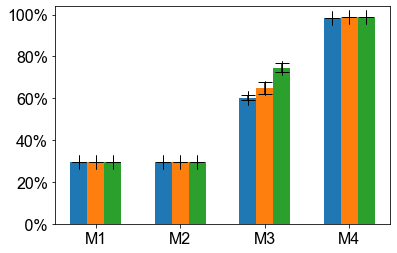

In [11]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def ffff(root, name):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

colors = ['C0','C1','C2','C3','C4','C5']

sgd_p1 = ffff('../data/mnist_classIL_sgd/2',['20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
ewc_p1 = ffff('../data/mnist_classIL_ewc/2',['20210628222203_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
joint_p1 = ffff('../data/mnist_classIL_joint/2',['20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
edfsnn_p1 = ffff('../data/mnist_classIL_edfsnn/25node',['20210714161701_nhid25_nalyers1_acc_seed_0.txt',
 '20210714161701_nhid25_nalyers1_acc_seed_1.txt',
 '20210714161701_nhid25_nalyers1_acc_seed_100.txt',
 '20210714161701_nhid25_nalyers1_acc_seed_1300.txt',
 '20210714161701_nhid25_nalyers1_acc_seed_4.txt'])


sgd_p2 = ffff('../data/mnist_classIL_sgd/2',['20210628151222_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_100.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1300.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151236_nhid50_nalyers1_acc_seed_1.txt'])
ewc_p2 = ffff('../data/mnist_classIL_ewc/2',['20210628151222_nhid50_nalyers1_acc_seed_1.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_1300.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_100.txt'])
joint_p2 = ffff('../data/mnist_classIL_joint/2',['20210628151220_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_100.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1300.txt'])
edfsnn_p2 = ffff('../data/mnist_classIL_edfsnn/50node',['20210714161701_nhid50_nalyers1_acc_seed_0.txt',
 '20210714161701_nhid50_nalyers1_acc_seed_1.txt',
 '20210714161701_nhid50_nalyers1_acc_seed_100.txt',
 '20210714161701_nhid50_nalyers1_acc_seed_1300.txt',
 '20210714161701_nhid50_nalyers1_acc_seed_4.txt'])

sgd_p = ffff('../data/mnist_classIL_sgd/2',['20210628113055_nhid100_nalyers1_acc_seed_1.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_100.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_4.txt',
 '20210628113105_nhid100_nalyers1_acc_seed_0.txt'])
ewc_p = ffff('../data/mnist_classIL_ewc/2',['20210628114627_nhid100_nalyers1_acc_seed_1.txt',
 '20210628114733_nhid100_nalyers1_acc_seed_100.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_0.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_4.txt'])
joint_p = ffff('../data/mnist_classIL_joint/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
edfsnn_p = ffff('../data/mnist_classIL_edfsnn/sota/2',['20210714160947_nhid75_nalyers1_acc_seed_0.txt',
 '20210714160947_nhid75_nalyers1_acc_seed_1.txt',
 '20210714160947_nhid75_nalyers1_acc_seed_100.txt',
 '20210714160947_nhid75_nalyers1_acc_seed_1300.txt',
 '20210714160947_nhid75_nalyers1_acc_seed_4.txt'])

from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,:].mean()
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
label = ['N', '2N', '3N']
# label.reverse()
for i in range(len(label)):
    y = [regression(x, sgd_list[i]).mean(), regression(x, ewc_list[i]).mean(), regression(x, edfsnn_list[i]).mean() , regression(x, joint_list[i]).mean()]
    yerr1 = np.array([regression(x, sgd_list[i]).std(), regression(x, ewc_list[i]).std(), regression(x, edfsnn_list[i]).std() , regression(x, joint_list[i]).std()])
    plt.bar(c+i*0.2, y, width=0.2,label=label[i])
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    plt.errorbar(c+i*0.2, y, fmt=" ", yerr=yerr1*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
    print('\tSGD ',' EWC ',' Joint ',' EDF-SNN ')
    print(label[i],':',np.array(y)-1)
    print(label[i],':',yerr1*lambda_std)
    f = open('f6_data.txt','a+')
    f.write('HWDB\n')
    f.write(' SGD EWC Joint EDF-SNN \n')
    f.write(label[i]+':'+str(np.around(np.array(y)-1,2))+'\n')
    f.close()
plt.xticks(c+0.2,['M1', 'M2', 'M3','M4'], fontsize=16)
plt.yticks(fontsize=16)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.savefig('C:\code\EDF图\incremental/mnist_hidden.svg')
plt.show()

### last class

[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
N : [-0.9        -0.899574   -0.683402   -0.01974707]
N : [0.         0.0001599  0.01941053 0.00072864]
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
2N : [-0.899898   -0.899816   -0.54141001 -0.01164849]
2N : [5.09999692e-05 9.19997692e-05 3.97049201e-02 3.55864685e-04]
[0.25 0.25 0.25 0.25]
	SGD   EWC   Joint   EDF-SNN 
3N : [-0.899254   -0.898328   -0.579594   -0.00707504]
3N : [0.000373   0.000836   0.0231122  0.00020555]


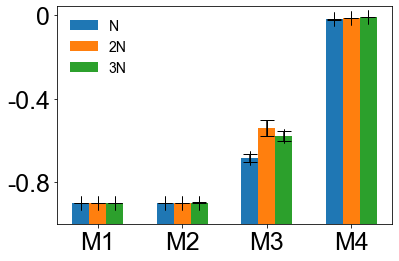

In [397]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
                x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    xx = np.zeros((n_seed, task))
    xx_mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
            xx[i, rho] = nnn[i][rho, rho]
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            xx_mean[j, k] = xx[j, :k+1].mean()
    mean = mean / xx_mean - 1
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def ffff(root, name):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
#     print(output)
    
    global task
    task = output.shape[1]
    return output

colors = ['C0','C1','C2','C3','C4','C5']

sgd_p1 = ffff('../data/mnist_classIL_sgd/2',['20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
ewc_p1 = ffff('../data/mnist_classIL_ewc/2',['20210628222203_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
joint_p1 = ffff('../data/mnist_classIL_joint/2',['20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt'])
edfsnn_p1 = ffff('../data/mnist_classIL_edfsnn/2',['20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222203_nhid25_nalyers1_acc_seed_4.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt'])


sgd_p2 = ffff('../data/mnist_classIL_sgd/2',['20210628151222_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_100.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1300.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151236_nhid50_nalyers1_acc_seed_1.txt'])
ewc_p2 = ffff('../data/mnist_classIL_ewc/2',['20210628151222_nhid50_nalyers1_acc_seed_1.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_1300.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_100.txt'])
joint_p2 = ffff('../data/mnist_classIL_joint/2',['20210628151220_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_100.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_1300.txt'])
edfsnn_p2 = ffff('../data/mnist_classIL_edfsnn/2',['20210628151222_nhid50_nalyers1_acc_seed_0.txt',
 '20210628151222_nhid50_nalyers1_acc_seed_1300.txt',
 '20210628151223_nhid50_nalyers1_acc_seed_4.txt',
 '20210628151224_nhid50_nalyers1_acc_seed_100.txt',
 '20210628151255_nhid50_nalyers1_acc_seed_1.txt'])

sgd_p = ffff('../data/mnist_classIL_sgd/2',['20210628113055_nhid100_nalyers1_acc_seed_1.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_100.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628113055_nhid100_nalyers1_acc_seed_4.txt',
 '20210628113105_nhid100_nalyers1_acc_seed_0.txt'])
ewc_p = ffff('../data/mnist_classIL_ewc/2',['20210628114627_nhid100_nalyers1_acc_seed_1.txt',
 '20210628114733_nhid100_nalyers1_acc_seed_100.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_0.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_4.txt'])
joint_p = ffff('../data/mnist_classIL_joint/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
edfsnn_p = ffff('../data/mnist_classIL_edfsnn/2',['20210628114628_nhid100_nalyers1_acc_seed_4.txt',
 '20210628114741_nhid100_nalyers1_acc_seed_0.txt',
 '20210628114750_nhid100_nalyers1_acc_seed_1.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628114849_nhid100_nalyers1_acc_seed_100.txt'])


from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,-1] + 1
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
label = ['N', '2N', '3N']
for i in range(len(label)):
    y = [regression(x, sgd_list[i]).mean(), regression(x, ewc_list[i]).mean(), regression(x, edfsnn_list[i]).mean() , regression(x, joint_list[i]).mean()]
    yerr1 = np.array([regression(x, sgd_list[i]).std(), regression(x, ewc_list[i]).std(), regression(x, edfsnn_list[i]).std() , regression(x, joint_list[i]).std()])
    plt.bar(c+i*0.2, y, width=0.2,label=label[i])
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    plt.errorbar(c+i*0.2, y, fmt=" ", yerr=yerr1*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
    print('\tSGD ',' EWC ',' Joint ',' EDF-SNN ')
    print(label[i],':',np.array(y)-1)
    print(label[i],':',np.array(yerr1*lambda_std))
    f = open('f6_data.txt','a+')
    f.write('HWDB\n')
    f.write(' SGD EWC Joint EDF-SNN \n')
    f.write(label[i]+':'+str(np.around(np.array(y)-1,2))+'\n')
    f.close()

plt.legend( loc='upper left',frameon=False,fontsize=14)
plt.xticks(c+0.2,['M1', 'M2', 'M3','M4'], fontsize=25)
plt.yticks([0.2,0.6,1],[-0.8,-0.4,0],fontsize=25)
plt.show()

# different numbers of hidden layers

## HWDB

seed_0. 50 	max 160 len 159
seed_1. 50 	max 160 len 160
seed_4. 50 	max 160 len 160
seed_100. 50 	max 160 len 158
seed_1300. 50 	max 160 len 160
seed_0. 50 	max 84 len 83
seed_1. 50 	max 84 len 83
seed_4. 50 	max 84 len 83
seed_100. 50 	max 84 len 83
seed_1300. 50 	max 84 len 83
seed_0. 50 	max 50 len 50
seed_1. 50 	max 50 len 50
seed_4. 50 	max 50 len 50
seed_100. 50 	max 50 len 50
seed_1300. 50 	max 50 len 50
[0.25 0.25 0.25 0.25]
	SGD   EWC   EDF-SNN   Joint 
three layers _MEAN: [-0.94806088 -0.94806918 -0.15524713 -0.00514399]
three layers _STD: [1.34168668e-05 1.17778947e-05 7.35167500e-03 6.53473269e-04]
[0.25 0.25 0.25 0.25]
	SGD   EWC   EDF-SNN   Joint 
two layers _MEAN: [-0.93356321 -0.9336901  -0.12718953 -0.00458168]
two layers _STD: [0.00082712 0.0007634  0.00756169 0.00066279]
[0.25       0.25       0.33333333 0.25      ]
	SGD   EWC   EDF-SNN   Joint 
one layer _MEAN: [-0.50899618 -0.50782339 -0.10444702 -0.00469559]
one layer _STD: [0.00617799 0.00605544 0.01271043 0.0008

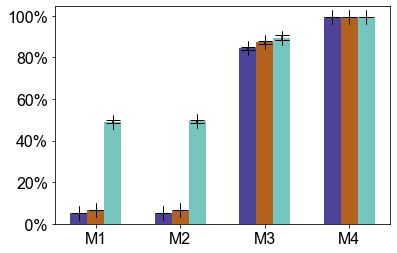

In [14]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  # sheet=0,1,...
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
                x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def ffff(root, name, xlim_max_=100):
    original_data=[]
    for i in range(len(name)):
        if 'joint合并' in root:
            print(name[i], xlim_max_,'\t',end='')
            original_data.append(read_split_joint(root,seed=name[i]))
        else:
            original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    original_data = original_data[:,:xlim_max_,:xlim_max_]
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

xlim_max = 100

sgd_p1 = ffff('../data/hwdb_classIL_sgd_nhid2000_lr0005/',['20210630181503_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630181503_nhid2000_nalyers1_acc_seed_1300.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630181506_nhid2000_nalyers1_acc_seed_4.txt'])
ewc_p1 = ffff('../data/hwdb_classIL_ewc_nhid2000_lr0005/',['20210630202923_nhid2000_nalyers1_acc_seed_1.txt',
         '20210630202923_nhid2000_nalyers1_acc_seed_100.txt',
         '20210630214418_nhid2000_nalyers1_acc_seed_4.txt',
         '20210630214420_nhid2000_nalyers1_acc_seed_0.txt',
         '20210630214421_nhid2000_nalyers1_acc_seed_1300.txt'])
joint_p1 = ffff('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p1 = ffff('../data/hwdb_classIL_edfsnn_nhid2000_lr0005/',[
                 '20210630181506_nhid2000_nalyers1_acc_seed_4.txt',
                 '20210630181506_nhid2000_nalyers1_acc_seed_1300.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_2.txt',
                 '20210701115207_nhid2000_nalyers1_acc_seed_200.txt'])

sgd_p2 = ffff('../data/hwdb_classIL_sgd_nhid2000_lr0005/',['20210630194725_nhid2000_nalyers2_acc_seed_0.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_1.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_100.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_1300.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_4.txt'])
ewc_p2 = ffff('../data/hwdb_classIL_ewc_nhid2000_lr0005/',['20210630214756_nhid2000_nalyers2_acc_seed_0.txt',
         '20210630214756_nhid2000_nalyers2_acc_seed_1.txt',
         '20210630214756_nhid2000_nalyers2_acc_seed_100.txt',
         '20210630214756_nhid2000_nalyers2_acc_seed_1300.txt',
         '20210630214756_nhid2000_nalyers2_acc_seed_4.txt'])
joint_p2 = ffff('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005_l2',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p2 = ffff('../data/hwdb_classIL_edfsnn_nhid2000_lr0005/',['20210630194725_nhid2000_nalyers2_acc_seed_0.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_1.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_100.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_1300.txt',
         '20210630194725_nhid2000_nalyers2_acc_seed_4.txt'])

sgd_p = ffff('../data/hwdb_classIL_sgd_nhid2000_lr0005/',['20210630204206_nhid2000_nalyers3_acc_seed_0.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_1.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_100.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_4.txt',
         '20210630204207_nhid2000_nalyers3_acc_seed_1300.txt'])
ewc_p = ffff('../data/hwdb_classIL_ewc_nhid2000_lr0005/',['20210630204206_nhid2000_nalyers3_acc_seed_0.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_1.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_100.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_1300.txt',
         '20210630204206_nhid2000_nalyers3_acc_seed_4.txt'])
joint_p = ffff('../data/joint合并/hwdb_classIL_joint_nhid2000_lr0005_l3',
                 ['seed_0.',
                 'seed_1.',
                 'seed_4.',
                 'seed_100.',
                 'seed_1300.'],50)
edfsnn_p = ffff('../data/hwdb_classIL_edfsnn_nhid2000_lr0005/',['20210630204206_nhid2000_nalyers3_acc_seed_0.txt',
             '20210630204206_nhid2000_nalyers3_acc_seed_1.txt',
             '20210630204206_nhid2000_nalyers3_acc_seed_100.txt',
             '20210630204206_nhid2000_nalyers3_acc_seed_1300.txt',
             '20210630204206_nhid2000_nalyers3_acc_seed_4.txt'])

from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,:].mean()
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
sgd_list.reverse()
ewc_list.reverse()
joint_list.reverse()
edfsnn_list.reverse()
label = ['one layer', 'two layers', 'three layers']
label.reverse()
colors = ['#4D4398', '#B2621C', '#74C6BE']
for i in range(len(label)):
    y = [regression(x, sgd_list[i]).mean(), regression(x, ewc_list[i]).mean(), regression(x, edfsnn_list[i]).mean() , regression(x, joint_list[i]).mean()]
    yerr1 = np.array([regression(x, sgd_list[i]).std(), regression(x, ewc_list[i]).std(), regression(x, edfsnn_list[i]).std() , regression(x, joint_list[i]).std()])
    plt.bar(c+i*0.2, y, width=0.2,label=label[i], color=colors[i])
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    plt.errorbar(c+i*0.2, y, fmt=" ", yerr=yerr1*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
    print('\tSGD ',' EWC ',' EDF-SNN ',' Joint ')
    print(label[i],'_MEAN:',np.array(y)-1)
    print(label[i],'_STD:',np.array(yerr1)*lambda_std)
    f = open('f6_data.txt','a+')
    f.write('HWDB\n')
    f.write(' SGD EWC Joint EDF-SNN \n')
    f.write(label[i]+':'+str(np.around(np.array(y)-1,2))+'\n')
    f.close()

plt.xticks(c+0.2,['M1', 'M2', 'M3','M4'], fontsize=16)
plt.yticks(fontsize=16)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.savefig('C:\code\EDF图\incremental/hwdb_node.svg')
plt.show()

## MNIST

[0.25 0.25 0.25 0.25]
	SGD   EWC   EDF-SNN   Joint 
three layers _MEAN: [-0.70707003 -0.7070506  -0.27825578 -0.01018641]
three layers _STD: [1.65714324e-05 2.62856483e-05 2.29969451e-02 2.72446990e-04]
[0.25 0.25 0.25 0.25]
	SGD   EWC   EDF-SNN   Joint 
two layers _MEAN: [-0.70463085 -0.70459464 -0.23582881 -0.01064476]
two layers _STD: [0.00118401 0.00119248 0.01203183 0.00021714]
[0.25 0.25 0.25 0.25]
	SGD   EWC   EDF-SNN   Joint 
one layer _MEAN: [-0.70382358 -0.70354654 -0.19202607 -0.01092172]
one layer _STD: [0.00110736 0.00107358 0.02306096 0.00024905]


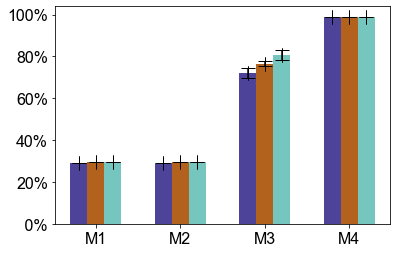

In [13]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import FuncFormatter
import xlrd
%matplotlib inline

class Get_name():
    def __init__(self, sheet):  
        self.data = xlrd.open_workbook("lookup.xlsx")
        self.tables = []
        self.table = self.data.sheets()[sheet]
        for rown in range(self.table.nrows):
            array = {'exp_name': '', 'real_name': ''}
            array['exp_name'] = self.table.cell_value(rown, 0)
            array['real_name'] = self.table.cell_value(rown, 1)
            self.tables.append(array)

    def real_name(self, name):
        tt = []
        for i in range(len(self.tables)):
            if name.split('-')[0] == self.tables[i]['exp_name']: return self.tables[i]['real_name']
            tt.append(self.tables[i]['exp_name'])
        if name.split('-')[0] not in tt: return name.split('-')[0]


def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                if root not in L: L.append(root)
    return L

def file_name2(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt':
                L.append(os.path.join(root, file))
    return L

def mydata(filename, seed):
    file = file_name(filename)
    dicts = {}
    for i in file:
        # i = '../res/es_5_2'
        ii = file_name2(i)
        x_ = np.zeros((10, 10))
        for k in range(len(ii)):
            x_ = np.loadtxt(ii[0],dtype=np.float32)
        dicts[i.split('\\')[-1]] = x_
    return dicts

def m_3(nnn):
    n_seed = nnn.shape[0]
    task = nnn.shape[1]
    mean = np.zeros((n_seed, task))
    for i in range(n_seed):
        for rho in range(task):
            mean[i, rho] = nnn[i][rho, :rho + 1].mean()
    return mean

def xxxx(file):
    x_ = np.loadtxt(file,dtype=np.float32)
    return x_

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']
plt.rcParams['font.sans-serif'] = ['Arial']  

def ffff(root, name):
    original_data=[]
    for i in range(len(name)):
        original_data.append(xxxx(os.path.join(root, name[i])))
    original_data = np.array(original_data)
    output = m_3(original_data)
    
    global task
    task = output.shape[1]
    return output

colors = ['#1F77B4','#FF7F0E','b','r','g','#5E9BD7','#A4A4A6','#FCBF01', 'deeppink', 'olive']

sgd_p1 = ffff('../data/mnist_classIL_sgd/2',['20210628113055_nhid100_nalyers1_acc_seed_1.txt',
'20210628113055_nhid100_nalyers1_acc_seed_100.txt',
'20210628113055_nhid100_nalyers1_acc_seed_1300.txt',
'20210628113055_nhid100_nalyers1_acc_seed_4.txt',
'20210628113105_nhid100_nalyers1_acc_seed_0.txt'])
ewc_p1 = ffff('../data/mnist_classIL_ewc/2',['20210628114627_nhid100_nalyers1_acc_seed_1.txt',
 '20210628114733_nhid100_nalyers1_acc_seed_100.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_0.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_1300.txt',
 '20210628114751_nhid100_nalyers1_acc_seed_4.txt'])
joint_p1 = ffff('../data/mnist_classIL_joint/2',['20210628114656_nhid100_nalyers1_acc_seed_100.txt',
 '20210628114656_nhid100_nalyers1_acc_seed_4.txt',
 '20210628114750_nhid100_nalyers1_acc_seed_1.txt',
 '20210628114752_nhid100_nalyers1_acc_seed_0.txt',
 '20210628114857_nhid100_nalyers1_acc_seed_1300.txt'])
edfsnn_p1 = ffff('../data/mnist_classIL_edfsnn/sota/1',['20210714160426_nhid100_nalyers1_acc_seed_0.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_100.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_1300.txt',
 '20210714160426_nhid100_nalyers1_acc_seed_4.txt'])

sgd_p2 = ffff('../data/mnist_classIL_sgd/2',['20210628114625_nhid100_nalyers2_acc_seed_100.txt',
 '20210628114626_nhid100_nalyers2_acc_seed_1300.txt',
 '20210628114628_nhid100_nalyers2_acc_seed_4.txt',
 '20210628114656_nhid100_nalyers2_acc_seed_0.txt',
 '20210628114750_nhid100_nalyers2_acc_seed_1.txt'])
ewc_p2 = ffff('../data/mnist_classIL_ewc/2',['20210628114628_nhid100_nalyers2_acc_seed_0.txt',
 '20210628114730_nhid100_nalyers2_acc_seed_1300.txt',
 '20210628114750_nhid100_nalyers2_acc_seed_100.txt',
 '20210628114843_nhid100_nalyers2_acc_seed_4.txt',
 '20210628114845_nhid100_nalyers2_acc_seed_1.txt'])
joint_p2 = ffff('../data/mnist_classIL_joint/2',['20210628114626_nhid100_nalyers2_acc_seed_1300.txt',
 '20210628114626_nhid100_nalyers2_acc_seed_4.txt',
 '20210628114738_nhid100_nalyers2_acc_seed_1.txt',
 '20210628114751_nhid100_nalyers2_acc_seed_0.txt',
 '20210628114753_nhid100_nalyers2_acc_seed_100.txt'])
edfsnn_p2 = ffff('../data/mnist_classIL_edfsnn/layer2',['20210714161701_nhid100_nalyers2_acc_seed_0.txt',
 '20210714161701_nhid100_nalyers2_acc_seed_1.txt',
 '20210714161701_nhid100_nalyers2_acc_seed_100.txt',
 '20210714161701_nhid100_nalyers2_acc_seed_1300.txt',
 '20210714161702_nhid100_nalyers2_acc_seed_4.txt'])

sgd_p = ffff('../data/mnist_classIL_sgd/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
ewc_p = ffff('../data/mnist_classIL_ewc/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
joint_p = ffff('../data/mnist_classIL_joint/2',['20210628135544_nhid100_nalyers3_acc_seed_0.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_100.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_1300.txt',
 '20210628135544_nhid100_nalyers3_acc_seed_4.txt'])
edfsnn_p = ffff('../data/mnist_classIL_edfsnn/layer3',['20210714161701_nhid100_nalyers3_acc_seed_0.txt',
 '20210714161701_nhid100_nalyers3_acc_seed_1.txt',
 '20210714161701_nhid100_nalyers3_acc_seed_100.txt',
 '20210714161701_nhid100_nalyers3_acc_seed_1300.txt',
 '20210714161701_nhid100_nalyers3_acc_seed_4.txt'])

from numpy.linalg import inv  
from numpy import dot  
from numpy import mat  

def regression(x, sgd_p):
    sss = np.zeros((1, sgd_p.shape[0]))
    for i in range(sss.shape[1]):
        sss[0 ,i]=sgd_p[i,:].mean()
    return sss

c = np.arange(4)
x = range(task)
sgd_list = [sgd_p1,sgd_p2, sgd_p]
ewc_list = [ewc_p1, ewc_p2,ewc_p]
joint_list = [joint_p1, joint_p2,joint_p]
edfsnn_list = [edfsnn_p1, edfsnn_p2,edfsnn_p]
sgd_list.reverse()
ewc_list.reverse()
joint_list.reverse()
edfsnn_list.reverse()
label = ['one layer', 'two layers', 'three layers']
label.reverse()
colors = ['#4D4398', '#B2621C', '#74C6BE']
for i in range(len(label)):
    y = [regression(x, sgd_list[i]).mean(), regression(x, ewc_list[i]).mean(), regression(x, edfsnn_list[i]).mean() , regression(x, joint_list[i]).mean()]
    yerr1 = np.array([regression(x, sgd_list[i]).std(), regression(x, ewc_list[i]).std(), regression(x, edfsnn_list[i]).std() , regression(x, joint_list[i]).std()])
    plt.bar(c+i*0.2, y, width=0.2,label=label[i], color=colors[i])
    lambda_std = 1/(np.array([sgd_list[i].shape[0]-1, ewc_list[i].shape[0]-1, edfsnn_list[i].shape[0]-1, joint_list[i].shape[0]-1]))
    print(lambda_std)
    plt.errorbar(c+i*0.2, y, fmt=" ", yerr=yerr1*lambda_std, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
    print('\tSGD ',' EWC ',' EDF-SNN ',' Joint ')
    print(label[i],'_MEAN:',np.array(y)-1)
    print(label[i],'_STD:',np.array(yerr1)*lambda_std)
    f = open('f6_data.txt','a+')
    f.write('HWDB\n')
    f.write(' SGD EWC Joint EDF-SNN \n')
    f.write(label[i]+':'+str(np.around(np.array(y)-1,2))+'\n')
    f.close()
plt.xticks(c+0.2,['M1', 'M2', 'M3','M4'], fontsize=16)
plt.yticks(fontsize=16)
def to_percent(temp, position):
    return '%2.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.savefig('C:\code\EDF图\incremental/mnist_node.svg')
plt.show()

# Cost in incremental 

In [130]:
cost = np.array([[2,2,1,2]]).T

## HWDB

[2.4266666666666667, 0.11623730516108456]
[12.473333333333334, 0.30214051182999146]
[12.546666666666667, 0.3088329285840127]
[3.3599999999999994, 2.4432582980747477]
[[24.94666667  0.60428102]
 [25.09333333  0.61766586]
 [ 2.42666667  0.11623731]
 [ 6.72        4.8865166 ]]


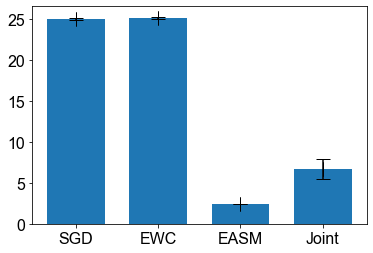

In [468]:
def mean_epoch(name, seed):
    path = os.path.join('C:\code\EDF\E-flow\data\能耗',name)
    file = open(os.path.join(path, seed), 'r',encoding='UTF-8').readlines()
    n_task = 0
    n_epoch = 0
    for i in range(len(file)):
        if 'Epoch   1' in file[i]: 
            n_task+=1
        if 'Epoch' in file[i]: 
            n_epoch+=1
        if n_task == 31:
            break
    assert not (n_task - 1 < 30), '类别数不足50个'
    mean_epoch = (n_epoch -1)/(n_task -1)
    return mean_epoch
epoch = {}
subepoch = []
subepoch.append(mean_epoch('hwdb_edfsnn', 'log_edfsnn_hwdb_nhid2000_0'))
subepoch.append(mean_epoch('hwdb_edfsnn', 'log_edfsnn_hwdb_nhid2000_1'))
subepoch.append(mean_epoch('hwdb_edfsnn', 'log_edfsnn_hwdb_nhid2000_5'))
subepoch.append(mean_epoch('hwdb_edfsnn', 'log_edfsnn_hwdb_nhid2000_4'))
subepoch.append(mean_epoch('hwdb_edfsnn', 'log_edfsnn_hwdb_nhid2000_1300'))
epoch['hwdb_edfsnn'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_sgd', 'log_sgd_hwdb_nhid2000_0'))
subepoch.append(mean_epoch('hwdb_sgd', 'log_sgd_hwdb_nhid2000_1'))
subepoch.append(mean_epoch('hwdb_sgd', 'log_sgd_hwdb_nhid2000_4'))
subepoch.append(mean_epoch('hwdb_sgd', 'log_sgd_hwdb_nhid2000_100'))
subepoch.append(mean_epoch('hwdb_sgd', 'log_sgd_hwdb_nhid2000_1300'))
epoch['hwdb_sgd'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_ewc', 'log_ewc_hwdb_nhid2000_0'))
subepoch.append(mean_epoch('hwdb_ewc', 'log_ewc_hwdb_nhid2000_1'))
subepoch.append(mean_epoch('hwdb_ewc', 'log_ewc_hwdb_nhid2000_4'))
subepoch.append(mean_epoch('hwdb_ewc', 'log_ewc_hwdb_nhid2000_100'))
subepoch.append(mean_epoch('hwdb_ewc', 'log_ewc_hwdb_nhid2000_1300'))
epoch['hwdb_ewc'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_joint', 'log_joint_hwdb_nhid2000_0'))
subepoch.append(mean_epoch('hwdb_joint', 'log_joint_hwdb_nhid2000_1'))
subepoch.append(mean_epoch('hwdb_joint', 'log_joint_hwdb_nhid2000_4'))
subepoch.append(mean_epoch('hwdb_joint', 'log_joint_hwdb_nhid2000_100'))
subepoch.append(mean_epoch('hwdb_joint', 'log_joint_hwdb_nhid2000_1300'))
epoch['hwdb_joint'] = subepoch

k = 0
for i in epoch.keys():
    epoch[i] = [np.mean(epoch[i]), np.std(epoch[i])]
    k+=1
    print(epoch[i])

x = np.zeros((4,2))
x[0] = epoch['hwdb_sgd']
x[1] = epoch['hwdb_ewc']
x[2] = epoch['hwdb_edfsnn']
x[3] = epoch['hwdb_joint']
x = x*cost
print(x)
plt.bar(range(4),x[:,0],width=0.7)
plt.errorbar(range(4), x[:,0], fmt=" ", yerr=x[:,1]/4, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.xticks(range(4),['SGD','EWC','EASM','Joint'],fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('C:\code\EDF图\incremental/HWDB_cost_bar.svg')

[3.5200000000000005, 0.3591100109994149]
[2.148, 0.037094473981982845]
[2.172, 0.037094473981982845]
[10.272, 3.823644334924471]
[[ 4.296       0.07418895]
 [ 4.344       0.07418895]
 [ 3.52        0.35911001]
 [20.544       7.64728867]]


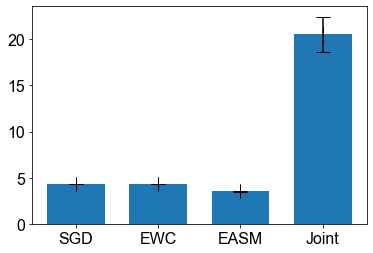

In [132]:
def mean_epoch(name, seed):
    path = os.path.join('C:\code\EDF\E-flow\data\能耗',name)
    file = open(os.path.join(path, seed), 'r',encoding='UTF-8').readlines()
    n_task = 0
    n_epoch = 0
    for i in range(len(file)):
        if 'Epoch   1' in file[i]: 
            n_task+=1
        if 'Epoch' in file[i]: 
            n_epoch+=1
        if n_task == 51:
            break
    assert not (n_task - 1 < 50), '类别数不足50个'
    mean_epoch = (n_epoch -1)/(n_task -1)
    return mean_epoch
epoch = {}
subepoch = []
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_edfsnn_0'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_edfsnn_1'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_edfsnn_4'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_edfsnn_100'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_edfsnn_1300'))
epoch['hwdb_edfsnn'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_sgd_0'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_sgd_1'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_sgd_4'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_sgd_100'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_sgd_1300'))
epoch['hwdb_sgd'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_ewc_0'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_ewc_1'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_ewc_4'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_ewc_100'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_ewc_1300'))
epoch['hwdb_ewc'] = subepoch
subepoch = []
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_joint_0'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_joint_1'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_joint_4'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_joint_100'))
subepoch.append(mean_epoch('hwdb_same_break', 'log_hwdb_joint_1300'))
epoch['hwdb_joint'] = subepoch

k = 0
for i in epoch.keys():
    epoch[i] = [np.mean(epoch[i]), np.std(epoch[i])]
    k+=1
    print(epoch[i])

x = np.zeros((4,2))
x[0] = epoch['hwdb_sgd']
x[1] = epoch['hwdb_ewc']
x[2] = epoch['hwdb_edfsnn']
x[3] = epoch['hwdb_joint']
x = x*cost
print(x)
plt.bar(range(4),x[:,0],width=0.7)
plt.errorbar(range(4), x[:,0], fmt=" ", yerr=x[:,1]/4, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.xticks(range(4),['SGD','EWC','EASM','Joint'],fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('C:\code\EDF图\incremental/HWDB_cost_bar.svg')

## MNIST

[1.0, 0.0]
[1.0, 0.0]
[1.0, 0.0]
[6.466666666666667, 0.7282653159188417]
[[ 2.          0.        ]
 [ 2.          0.        ]
 [ 1.          0.        ]
 [12.93333333  1.45653063]]


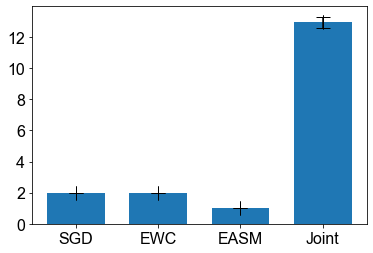

In [469]:
def mean_epoch(name, seed):
    path = os.path.join('C:\code\EDF\E-flow\data\能耗',name)
    file = open(os.path.join(path, seed), 'r',encoding='UTF-8').readlines()
    n_task = 0
    n_epoch = 0
    for i in range(len(file)):
        if 'Epoch   1' in file[i]: 
            n_task+=1
        if 'Epoch' in file[i]: 
            n_epoch+=1
    assert not (n_task < 10), '类别数不足10个'
    mean_epoch = (n_epoch -1)/(n_task -1)
    return mean_epoch
epoch = {}
subepoch = []
subepoch.append(mean_epoch('mnist', 'log_mnist_edfsnn_0'))
subepoch.append(mean_epoch('mnist', 'log_mnist_edfsnn_1'))
subepoch.append(mean_epoch('mnist', 'log_mnist_edfsnn_4'))
subepoch.append(mean_epoch('mnist', 'log_mnist_edfsnn_100'))
subepoch.append(mean_epoch('mnist', 'log_mnist_edfsnn_1300'))
epoch['mnist_edfsnn'] = subepoch
subepoch = []
subepoch.append(mean_epoch('mnist', 'log_mnist_sgd_0'))
subepoch.append(mean_epoch('mnist', 'log_mnist_sgd_1'))
subepoch.append(mean_epoch('mnist', 'log_mnist_sgd_4'))
subepoch.append(mean_epoch('mnist', 'log_mnist_sgd_100'))
subepoch.append(mean_epoch('mnist', 'log_mnist_sgd_1300'))
epoch['mnist_sgd'] = subepoch
subepoch = []
subepoch.append(mean_epoch('mnist', 'log_mnist_ewc_0'))
subepoch.append(mean_epoch('mnist', 'log_mnist_ewc_1'))
subepoch.append(mean_epoch('mnist', 'log_mnist_ewc_4'))
subepoch.append(mean_epoch('mnist', 'log_mnist_ewc_100'))
subepoch.append(mean_epoch('mnist', 'log_mnist_ewc_1300'))
epoch['mnist_ewc'] = subepoch
subepoch = []
subepoch.append(mean_epoch('mnist', 'log_mnist_joint_0'))
subepoch.append(mean_epoch('mnist', 'log_mnist_joint_1'))
subepoch.append(mean_epoch('mnist', 'log_mnist_joint_4'))
subepoch.append(mean_epoch('mnist', 'log_mnist_joint_100'))
subepoch.append(mean_epoch('mnist', 'log_mnist_joint_1300'))
epoch['mnist_joint'] = subepoch

for i in epoch.keys():
    epoch[i] = [np.mean(epoch[i]), np.std(epoch[i])]
    print(epoch[i])
    
x = np.zeros((4,2))
x[0] = epoch['mnist_sgd']
x[1] = epoch['mnist_ewc']
x[2] = epoch['mnist_edfsnn']
x[3] = epoch['mnist_joint']
x = x*cost
print(x)
plt.bar(range(4),x[:,0],width=0.7)
plt.errorbar(range(4), x[:,0], fmt=" ", yerr=x[:,1]/4, xerr=0, capsize=7, color='black', capthick =1, elinewidth=0)
plt.xticks(range(4),['SGD','EWC','EASM','Joint'],fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('C:\code\EDF图\incremental/MNIST_cost_bar.svg')

## analysis of weights

odict_keys(['fc1.weight', 'fc2.weight', 'last.weight', 'last.bias'])
mean,std: -0.4361163 0.229561


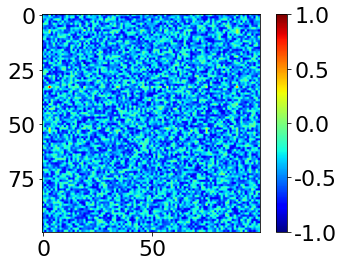

(10000,)
odict_keys(['fc1.weight', 'fc2.weight', 'last.weight', 'last.bias'])
mean,std: -0.44194517 0.22333768


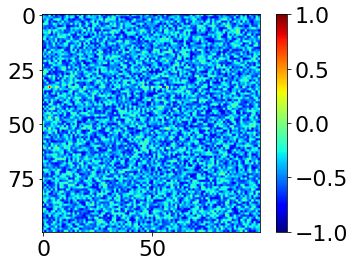

(10000,)
odict_keys(['fcs.0.fc.weight', 'fcs.0.bn.weight', 'fcs.0.bn.bias', 'fcs.0.bn.running_mean', 'fcs.0.bn.running_var', 'fcs.0.bn.num_batches_tracked', 'fcs.1.fc.weight', 'fcs.1.bn.weight', 'fcs.1.bn.bias', 'fcs.1.bn.running_mean', 'fcs.1.bn.running_var', 'fcs.1.bn.num_batches_tracked', 'efcs.0.weight', 'efcs.1.weight', 'last.fc.weight', 'last.fc.bias', 'last.bn.weight', 'last.bn.bias', 'last.bn.running_mean', 'last.bn.running_var', 'last.bn.num_batches_tracked'])
mean,std: 0.17246479 0.21849778


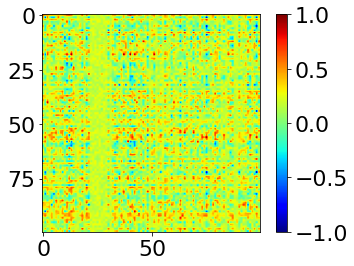

(10000,)
odict_keys(['fc1.weight', 'fc2.weight', 'last.weight', 'last.bias'])
mean,std: 0.00382714 0.57693


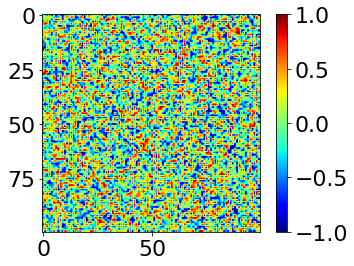

(10000,)


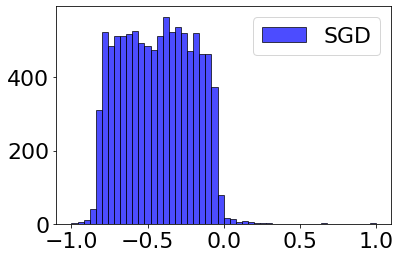

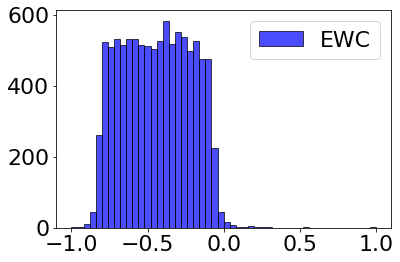

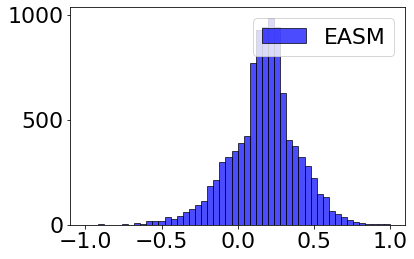

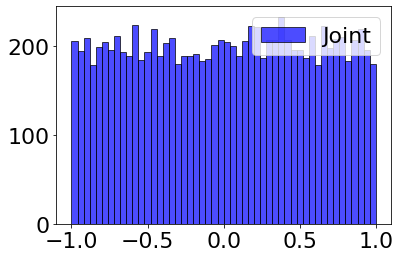

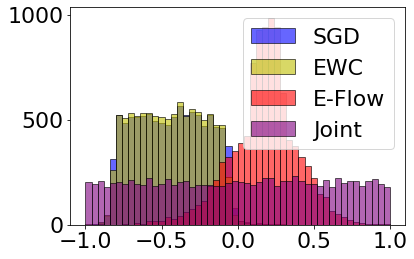

In [11]:
import torch
import seaborn as sns

plt.rcParams.update({'font.size': 22})

#SGD
sgd = torch.load('C:\code\EDF\E-Flow\data\model\sgd/20210629134407_nhid100_nalyers2_model.pth')
print(sgd['model'].keys())
fc2weight = sgd['model']['fc2.weight'].cpu().numpy()
fc2weight = ((fc2weight - fc2weight.min())/(fc2weight.max() - fc2weight.min()))*2 -1
print('mean,std:',fc2weight.mean(), fc2weight.std())
plt.imshow(fc2weight,cmap='jet',vmin=-1, vmax=1)
cbar = plt.colorbar(format='%0.1f')
plt.savefig('C:\code\EDF图\incremental/weight_sgd.svg')
plt.show()
fc2weight = fc2weight.reshape(-1,)
print(fc2weight.shape)

#EWC
ewc = torch.load('C:\code\EDF\E-Flow\data\model\ewc/20210629134355_nhid100_nalyers2_model.pth')
print(ewc['model'].keys())
fc2weight_ewc = ewc['model']['fc2.weight'].cpu().numpy()
fc2weight_ewc = (fc2weight_ewc - fc2weight_ewc.min())/(fc2weight_ewc.max() - fc2weight_ewc.min()) * 2 -1 
print('mean,std:',fc2weight_ewc.mean(), fc2weight_ewc.std())
plt.imshow(fc2weight_ewc,cmap='jet',vmin=-1, vmax=1)
plt.colorbar()
plt.savefig('C:\code\EDF图\incremental/weight_ewc.svg')
plt.show()
fc2weight_ewc = fc2weight_ewc.reshape(-1,)
print(fc2weight_ewc.shape)

#EAST
edfsnn = torch.load('C:\code\EDF\E-Flow\data\model\edfsnn/20210629134434_nhid100_nalyers2_model.pth')
print(edfsnn['model'].keys())
fc2weight_edf = edfsnn['model']['fcs.1.fc.weight'].cpu().numpy()
fc2weight_edf = (fc2weight_edf - fc2weight_edf.min())/(fc2weight_edf.max() - fc2weight_edf.min()) * 2 -1
print('mean,std:',fc2weight_edf.mean(), fc2weight_edf.std())
plt.imshow(fc2weight_edf,cmap='jet',vmin=-1, vmax=1)
plt.colorbar()
plt.savefig('C:\code\EDF图\incremental/weight_edfsnn.svg')
plt.show()
fc2weight_edf = fc2weight_edf.reshape(-1,)
print(fc2weight_edf.shape)

#joint
edfsnn = torch.load('C:\code\EDF\E-Flow\data\model\joint/20210630085456_nhid100_nalyers2_model.pth')
print(edfsnn['model'].keys())
fc2weight_joint = edfsnn['model']['fc2.weight'].cpu().numpy()
fc2weight_joint = (fc2weight_joint - fc2weight_joint.min())/(fc2weight_joint.max() - fc2weight_joint.min()) * 2 -1
print('mean,std:',fc2weight_joint.mean(), fc2weight_joint.std())
plt.imshow(fc2weight_joint,cmap='jet',vmin=-1, vmax=1)
plt.colorbar()
plt.savefig('C:\code\EDF图\incremental/weight_joint.svg')
plt.show()
fc2weight_joint = fc2weight_joint.reshape(-1,)
print(fc2weight_joint.shape)

plt.hist(fc2weight, alpha=0.7,bins=50,color='b',label='SGD',range=[-1,1],edgecolor='k') #b,y,r,purple
plt.legend(loc='upper right')
plt.savefig('C:\code\EDF图\incremental/hist_sgd.svg')
plt.show()
plt.hist(fc2weight_ewc, alpha=0.7,bins=50,color='b',label='EWC',range=[-1,1],edgecolor='k')
plt.legend(loc='upper right')
plt.savefig('C:\code\EDF图\incremental/hist_ewc.svg')
plt.show()
plt.hist(fc2weight_edf, alpha=0.7,bins=50,color='b',label='EASM',range=[-1,1],edgecolor='k')
plt.legend(loc='upper right')
plt.savefig('C:\code\EDF图\incremental/hist_edfsnn.svg')
plt.show()
plt.hist(fc2weight_joint, alpha=0.7,bins=50,color='b',label='Joint',range=[-1,1],edgecolor='k')
plt.legend(loc='upper right')
plt.savefig('C:\code\EDF图\incremental/hist_joint.svg')
plt.show()

plt.hist(fc2weight, alpha=0.6,bins=50,color='b',label='SGD',range=[-1,1],edgecolor='k')
plt.hist(fc2weight_ewc, alpha=0.6,bins=50,color='y',label='EWC',range=[-1,1],edgecolor='k')
plt.hist(fc2weight_edf, alpha=0.6,bins=50,color='r',label='E-Flow',range=[-1,1],edgecolor='k')
plt.hist(fc2weight_joint, alpha=0.6,bins=50,color='purple',label='Joint',range=[-1,1],edgecolor='k')
plt.legend()
plt.savefig('C:\code\EDF图\incremental/hist_all.svg')
plt.show()

# shuffle pixels of pictures in mnist datasets

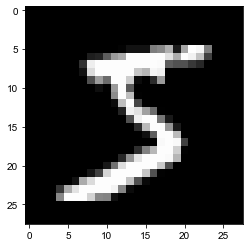

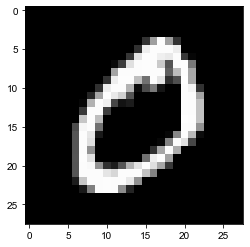

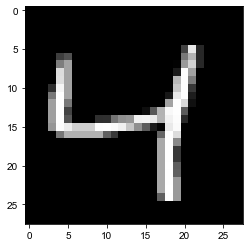

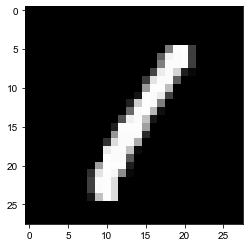

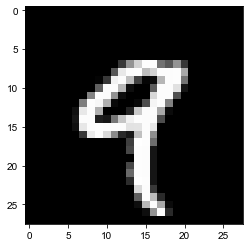

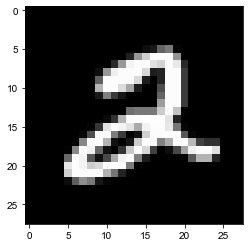

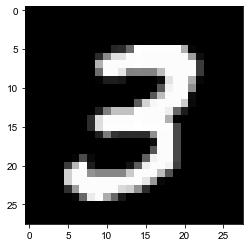

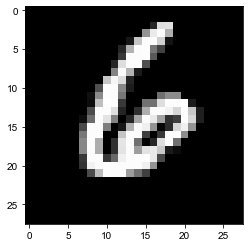

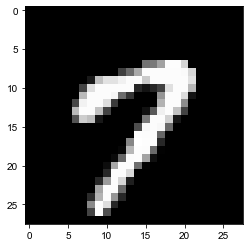

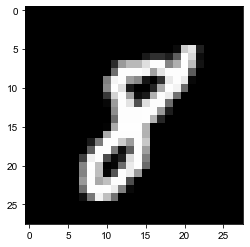

In [246]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
torch.manual_seed(1)

EPOCH=1
BATCH_SIZE=64
LR=0.001
train_data=torchvision.datasets.MNIST(
     root= './mnist/',
     train=True,
     transform=torchvision.transforms.ToTensor(),
     download=False
     )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)

labels = []
images = []
i = 0 
while True:
    image_array,label=train_data[i]
    i+=1
    if label not in labels:
        labels.append(label)
        image_array=image_array.reshape(28,28) 
        images.append(image_array)
        plt.imshow(image_array,cmap = plt.cm.gray)
        plt.show()
        if len(labels)==10: break


[5, 0, 4, 1, 9, 2, 3, 6, 7, 8]


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/original_mnist_5.svg'

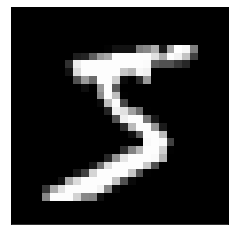

In [247]:
import random
import numpy as np
from sklearn.utils import shuffle
print(labels)
for i in range(len(images)):
    plt.xticks([])
    plt.yticks([])
    aux = images[i].view(-1).numpy()
    image_array = torch.FloatTensor(aux).view(28,28)
    plt.imshow(image_array,cmap = plt.cm.gray)
    plt.savefig('Figures/original_mnist_'+str(labels[i])+'.svg')
    plt.show()

# Figures after coding by random sampling

(428, 428, 3)


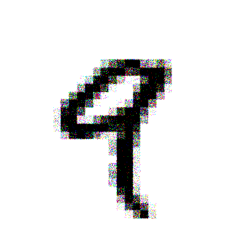

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np

lena = mpimg.imread('C:\\code\\EDF图\\classification\\2.png') 
lena = np.array(lena > np.random.rand(lena.shape[0],lena.shape[1],lena.shape[2])).astype(float)
print(lena.shape) 

plt.imshow(lena, cmap='Greys_r') 
plt.axis('off') 
plt.show()

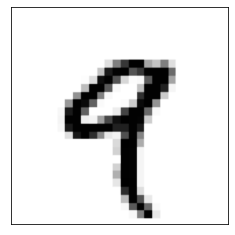

In [103]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\2.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classMNI.svg')
plt.show()

torch.Size([324, 380, 1])


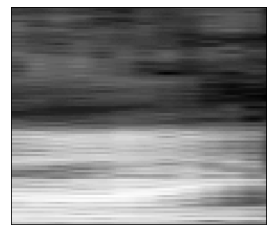

In [111]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\1.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
print(image_tensor.shape)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID.svg')
plt.show()

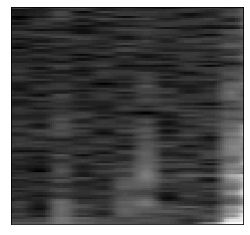

In [112]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\3.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID1.svg')
plt.show()

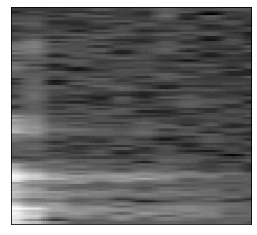

In [113]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\4.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID2.svg')
plt.show()

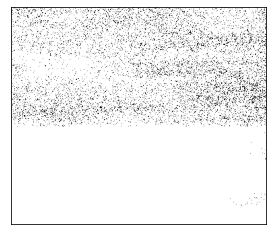

In [117]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\1.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
image_tensor = np.array(image_tensor > 0.5 * torch.rand(image_tensor.shape[0],image_tensor.shape[1],image_tensor.shape[2])).astype(float)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID_1.svg')
plt.show()

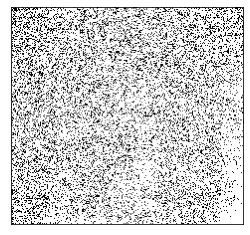

In [118]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\3.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
image_tensor = np.array(image_tensor > 0.5 * torch.rand(image_tensor.shape[0],image_tensor.shape[1],image_tensor.shape[2])).astype(float)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID1_1.svg')
plt.show()

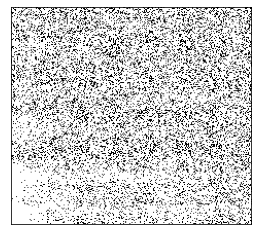

In [119]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


image_path = 'C:\\code\\EDF图\\classification\\4.png'
image = Image.open(image_path)
 
input_transform = transforms.Compose([
   transforms.Grayscale(1), 
   transforms.ToTensor(),
])
image_tensor = input_transform(image).permute(1,2,0)
image_tensor = np.array(image_tensor > 0.5 * torch.rand(image_tensor.shape[0],image_tensor.shape[1],image_tensor.shape[2])).astype(float)
plt.imshow(image_tensor, cmap='Greys_r') 
plt.xticks(())
plt.yticks(())
plt.savefig('Figures/classTID2_1.svg')
plt.show()

# trace

### EAST

(10, 100)


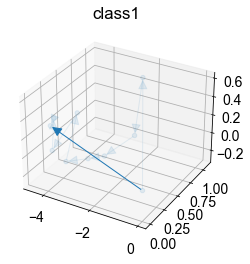

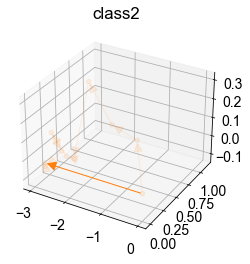

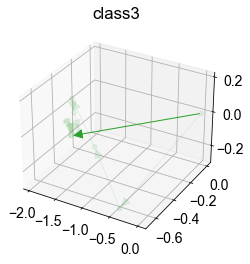

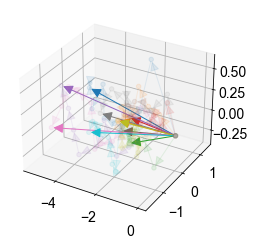

********************
(100, 100)
(100, 3)


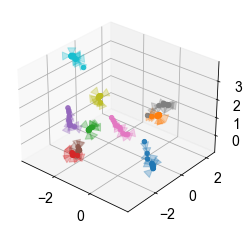

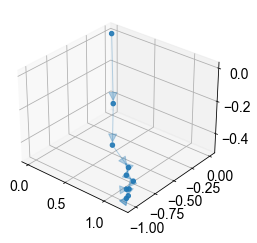

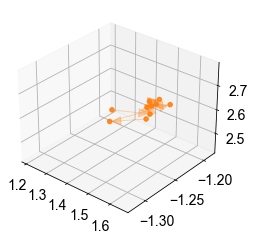

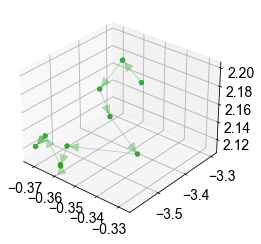

In [156]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

x = np.load("../data/trace_mnist_tensor([0], device='cuda_0')_full.npy")
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class1 = np.array(y).mean(1)
index = np.linspace(0,class1.shape[0]-1,10).astype(int)
class1 = class1[index]

x = np.load("../data/trace_mnist_tensor([1], device='cuda_0')_full.npy")
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class2 = np.array(y).mean(1)
index = np.linspace(0,class2.shape[0]-1,10).astype(int)
class2 = class2[index]

x = np.load("../data/trace_mnist_tensor([2], device='cuda_0')_full.npy")
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class3 = np.array(y).mean(1)
index = np.linspace(0,class3.shape[0]-1,10).astype(int)
class3 = class3[index]

def classdata(data):
    x = np.load(data)
    y = []
    for i in range(0,x.shape[0],20):
        y.append(x[i:i+20,:,:].mean(0))
    class3 = np.array(y).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class4 = classdata("../data/trace_mnist_tensor([3], device='cuda_0')_full.npy")
class5 = classdata("../data/trace_mnist_tensor([4], device='cuda_0')_full.npy")
class6 = classdata("../data/trace_mnist_tensor([5], device='cuda_0')_full.npy")
class7 = classdata("../data/trace_mnist_tensor([6], device='cuda_0')_full.npy")
class8 = classdata("../data/trace_mnist_tensor([7], device='cuda_0')_full.npy")
class9 = classdata("../data/trace_mnist_tensor([8], device='cuda_0')_full.npy")
class10 = classdata("../data/trace_mnist_9_full.npy")
print(class3.shape)


plt.rcParams.update({'font.size': 14})
ax = plt.axes(projection='3d')  
def plot3D(class1,color,name=None):
    class1 = manifold.Isomap(n_components=3).fit_transform(class1)
    X1 = class1[:,0] - class1[0,0]
    Y1 = class1[:,1] - class1[0,1]
    Z1 = class1[:,2] - class1[0,2]
    ax.set_title(name)
    ax.scatter3D(X1, Y1, Z1,color=color,alpha=.1)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=color, alpha=.1)#, linestyle="dashed")
        ax.add_artist(a1)
    a1 = Arrow3D([X1[0],X1[-1]],[Y1[0],Y1[-1]],[Z1[0],Z1[-1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=color)#
    ax.add_artist(a1)
ax = plt.axes(projection='3d')  
plot3D(class1,'C0',name='class1')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d')  
plot3D(class2,'C1',name='class2')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d') 
plot3D(class3,'C2',name='class3')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d') 
plot3D(class4,'C2',name='class4')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d')  
plot3D(class5,'C2',name='class5')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d')  
plot3D(class6,'C2',name='class6')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d') 
plot3D(class7,'C2',name='class7')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d') 
plot3D(class8,'C2',name='class8')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d') 
plot3D(class9,'C2',name='class9')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d')  
plot3D(class10,'C2',name='class10')
ax.view_init(elev=30, azim=-60)

ax = plt.axes(projection='3d') 
ax.view_init(elev=30, azim=-60)
plot3D(class1,'C0')
plot3D(class2,'C1')
plot3D(class3,'C2')
plot3D(class4,'C3')
plot3D(class5,'C4')
plot3D(class6,'C5')
plot3D(class7,'C6')
plot3D(class8,'C7')
plot3D(class9,'C8')
plot3D(class10,'C9')
plt.show()

print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = PCA(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/pca10.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

(30, 100)
(30, 3)


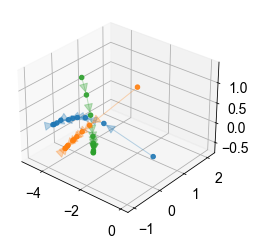

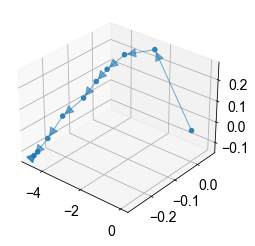

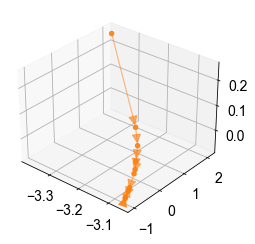

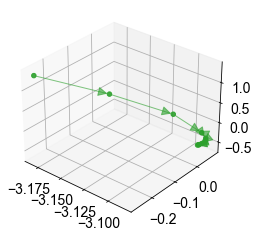

In [157]:
class_ = np.r_[classx,class2,class3]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = manifold.Isomap(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,30,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/iso123.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.6)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/iso1.svg')
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.6)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/iso2.svg')
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.6)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/iso3.svg')
plt.show()

(30, 100)
(30, 3)


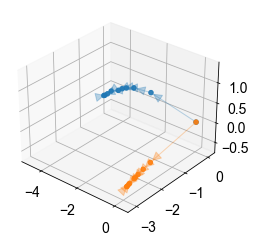

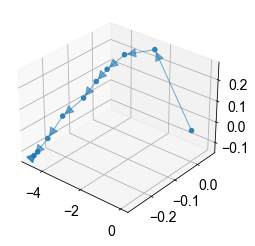

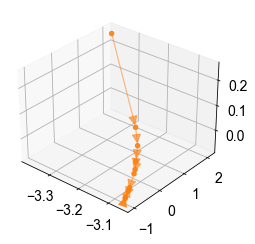

In [169]:
class_ = np.r_[classx,class2,class3]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = manifold.Isomap(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]

X1 = X1_[0:0+10]
Y1 = Y1_[0:0+10]
Z1 = Z1_[0:0+10]
ax.scatter3D(X1, Y1, Z1,color=colors[0],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[0], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
    
errx = X1_[10]-X1_[0]
erry = Y1_[10]-Y1_[0]
errz = Z1_[10]-Z1_[0]
X1 = X1_[10:10+10] - errx
Y1 = Y1_[10:10+10] - erry
Z1 = Z1_[10:10+10] - errz
ax.scatter3D(X1, Y1, Z1,color=colors[1],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[1], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
    
X1 = X1_[20:20+10]
Y1 = Y1_[20:20+10]
Z1 = Z1_[20:20+10]
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.0)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.0)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/iso12.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[0], alpha=.6)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[1], alpha=.6)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

#### test set in EAST

(1280, 16, 100)
(1200, 16, 100)
(1220, 16, 100)
(1260, 16, 100)
(1400, 16, 100)
(1180, 16, 100)
(1280, 16, 100)
(1260, 16, 100)
(1220, 16, 100)
(1100, 16, 100)
********************
(100, 100)
(100, 3)


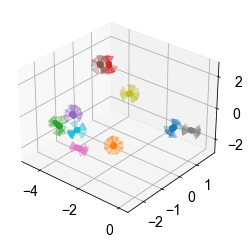

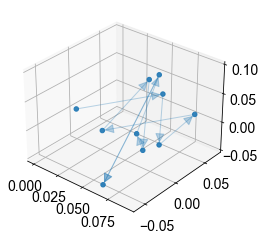

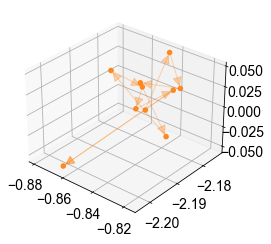

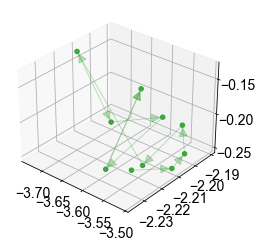

In [152]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def classdata(data):
    x = np.load(data)
    print(x.shape)
    y = []
    for i in range(0,x.shape[0],20):
        y.append(x[i:i+20,:,:].mean(0))
    class3 = np.array(y).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class1 = classdata("../data/sgd_trace/trace_mnist_0_full_edf_test.npy")
class2 = classdata("../data/sgd_trace/trace_mnist_1_full_edf_test.npy")
class3 = classdata("../data/sgd_trace/trace_mnist_2_full_edf_test.npy")
class4 = classdata("../data/sgd_trace/trace_mnist_3_full_edf_test.npy")
class5 = classdata("../data/sgd_trace/trace_mnist_4_full_edf_test.npy")
class6 = classdata("../data/sgd_trace/trace_mnist_5_full_edf_test.npy")
class7 = classdata("../data/sgd_trace/trace_mnist_6_full_edf_test.npy")
class8 = classdata("../data/sgd_trace/trace_mnist_7_full_edf_test.npy")
class9 = classdata("../data/sgd_trace/trace_mnist_8_full_edf_test.npy")
class10 = classdata("../data/sgd_trace/trace_mnist_9_full_edf_test.npy")


plt.rcParams.update({'font.size': 14})
print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = PCA(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/edfsnnpca.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

### multi class trace

(100, 100)
(100, 3)


KeyboardInterrupt: 

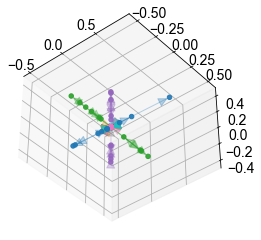

In [153]:
from tqdm import tqdm 
class_ = np.r_[classx,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
class1 = class_
color='C0'
class1 = manifold.Isomap(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
a=0
for k in range(-180,180,10):
    for z in range(-180,180,10):
        ax = plt.axes(projection='3d')  
        for j in range(0,100,10):
            X1 = X1_[j:j+10]
            Y1 = Y1_[j:j+10]
            Z1 = Z1_[j:j+10]
            ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
            for i in range(0,X1.shape[0]-1):
                a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
                ax.add_artist(a1)
        ax.add_artist(a1)
        ax.view_init(elev=k, azim=-50)
        plt.savefig('C:\code\edf-gif/iso_{}.jpg'.format(a),dpi=300)
        a+=1

(10, 50)


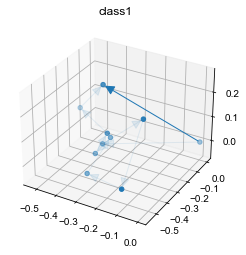

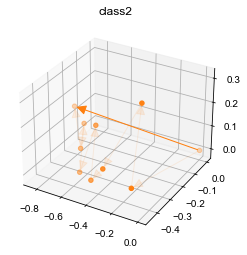

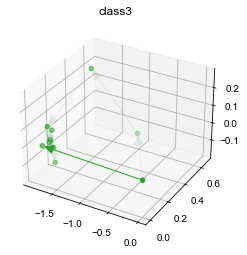

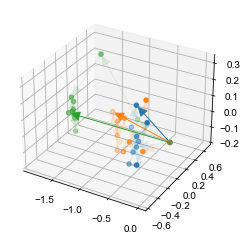

In [294]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

x = np.load('../data/trace_hwdb_0.npy')
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class1 = np.array(y).mean(1)
index = np.linspace(0,class1.shape[0]-1,10).astype(int)
class1 = class1[index]

x = np.load('../data/trace_hwdb_1.npy')
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class2 = np.array(y).mean(1)
index = np.linspace(0,class2.shape[0]-1,10).astype(int)
class2 = class2[index]

x = np.load('../data/trace_hwdb_2.npy')
y = []
for i in range(0,x.shape[0],20):
    y.append(x[i:i+20,:,:].mean(0))
class3 = np.array(y).mean(1)
index = np.linspace(0,class3.shape[0]-1,10).astype(int)
class3 = class3[index]


print(class3.shape)
ax = plt.axes(projection='3d')  
def plot3D(class1,color,name=None):
    class1 = PCA(n_components=3).fit_transform(class1)
    X1 = class1[:,0] - class1[0,0]
    Y1 = class1[:,1] - class1[0,1]
    Z1 = class1[:,2] - class1[0,2]
    ax.set_title(name)
    ax.scatter3D(X1, Y1, Z1,color=color)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=color, alpha=.1)#, linestyle="dashed")
        ax.add_artist(a1)
    a1 = Arrow3D([X1[0],X1[-1]],[Y1[0],Y1[-1]],[Z1[0],Z1[-1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=color)#
    ax.add_artist(a1)
#     ax.grid(False)
ax = plt.axes(projection='3d')  
plot3D(class1,'C0',name='class1')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d')  
plot3D(class2,'C1',name='class2')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d')  
plot3D(class3,'C2',name='class3')
ax.view_init(elev=30, azim=-60)
plt.show()

ax = plt.axes(projection='3d')  
ax.view_init(elev=30, azim=-60)
plot3D(class1,'C0')
plot3D(class2,'C1')
plot3D(class3,'C2')
plt.show()

### sgd

(10, 100)
********************
(100, 100)
(100, 3)


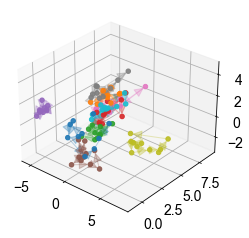

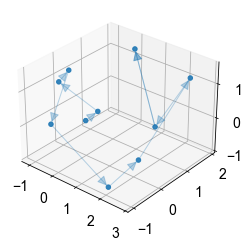

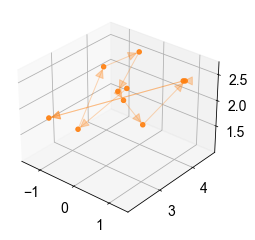

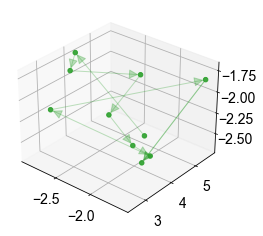

In [420]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def classdata(data):
    x = np.load(data)
    class3 = np.array(x).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class1 = classdata("../data/sgd_trace/trace_mnist_0_full_sgd_test.npy")
class2 = classdata("../data/sgd_trace/trace_mnist_1_full_sgd_test.npy")
class3 = classdata("../data/sgd_trace/trace_mnist_2_full_sgd_test.npy")
class4 = classdata("../data/sgd_trace/trace_mnist_3_full_sgd_test.npy")
class5 = classdata("../data/sgd_trace/trace_mnist_4_full_sgd_test.npy")
class6 = classdata("../data/sgd_trace/trace_mnist_5_full_sgd_test.npy")
class7 = classdata("../data/sgd_trace/trace_mnist_6_full_sgd_test.npy")
class8 = classdata("../data/sgd_trace/trace_mnist_7_full_sgd_test.npy")
class9 = classdata("../data/sgd_trace/trace_mnist_8_full_sgd_test.npy")
class10 = classdata("../data/sgd_trace/trace_mnist_9_full_sgd_test.npy")
print(class3.shape)


plt.rcParams.update({'font.size': 14})
print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = PCA(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/sgdpca.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

(10, 100)
********************
(30, 100)
(30, 3)


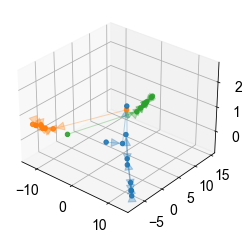

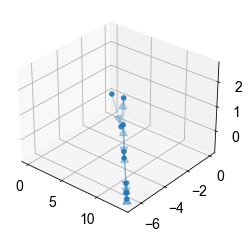

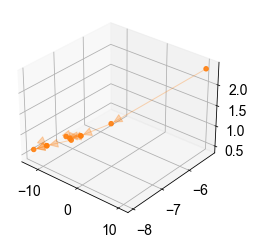

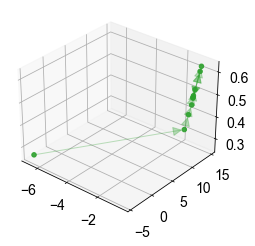

In [390]:
import numpy as np
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def classdata(data):
    x = np.load(data)
    class3 = np.array(x).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class1 = classdata("../data/sgd_trace/trace_mnist_0_full_sgd.npy")
class2 = classdata("../data/sgd_trace/trace_mnist_1_full_sgd.npy")
class3 = classdata("../data/sgd_trace/trace_mnist_2_full_sgd.npy")
class4 = classdata("../data/sgd_trace/trace_mnist_3_full_sgd.npy")
class5 = classdata("../data/sgd_trace/trace_mnist_4_full_sgd.npy")
class6 = classdata("../data/sgd_trace/trace_mnist_5_full_sgd.npy")
class7 = classdata("../data/sgd_trace/trace_mnist_6_full_sgd.npy")
class8 = classdata("../data/sgd_trace/trace_mnist_7_full_sgd.npy")
class9 = classdata("../data/sgd_trace/trace_mnist_8_full_sgd.npy")
class10 = classdata("../data/sgd_trace/trace_mnist_9_full_sgd.npy")
print(class3.shape)


plt.rcParams.update({'font.size': 14})
print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = Isomap(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

In [394]:
x = np.load("C:\code\EDF\E-flow\data\sgd_trace/trace_mnist_0_full_sgd_test.npy",allow_pickle=True)
print(x.shape)

(64, 16, 100)


### EWC

(10, 100)
********************
(100, 100)
(100, 3)


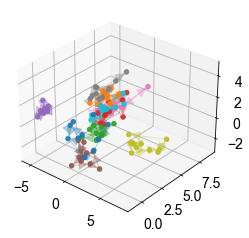

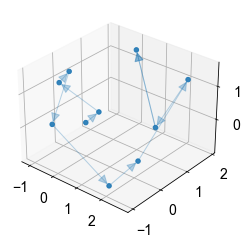

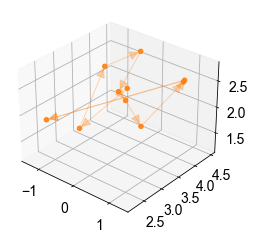

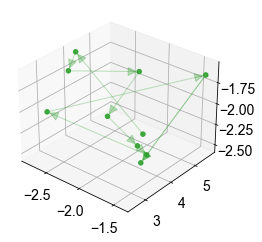

In [419]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def classdata(data):
    x = np.load(data)
    class3 = np.array(x).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class1 = classdata("../data/sgd_trace/trace_mnist_0_full_ewc_test.npy")
class2 = classdata("../data/sgd_trace/trace_mnist_1_full_ewc_test.npy")
class3 = classdata("../data/sgd_trace/trace_mnist_2_full_ewc_test.npy")
class4 = classdata("../data/sgd_trace/trace_mnist_3_full_ewc_test.npy")
class5 = classdata("../data/sgd_trace/trace_mnist_4_full_ewc_test.npy")
class6 = classdata("../data/sgd_trace/trace_mnist_5_full_ewc_test.npy")
class7 = classdata("../data/sgd_trace/trace_mnist_6_full_ewc_test.npy")
class8 = classdata("../data/sgd_trace/trace_mnist_7_full_ewc_test.npy")
class9 = classdata("../data/sgd_trace/trace_mnist_8_full_ewc_test.npy")
class10 = classdata("../data/sgd_trace/trace_mnist_9_full_ewc_test.npy")
print(class3.shape)


plt.rcParams.update({'font.size': 14})
print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = PCA(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/ewcpca.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9)  
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

### Joint

(64, 16, 100)
(60, 16, 100)
(61, 16, 100)
(63, 16, 100)
(70, 16, 100)
(59, 16, 100)
(64, 16, 100)
(63, 16, 100)
(61, 16, 100)
(55, 16, 100)
(10, 100)
********************
(100, 100)
(100, 3)


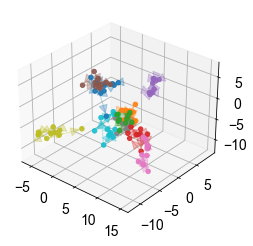

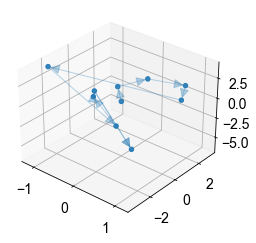

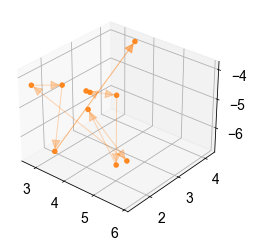

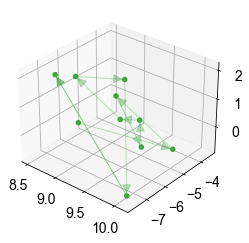

In [418]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def classdata(data):
    x = np.load(data)
    print(x.shape)
    class3 = np.array(x).mean(1)
    index = np.linspace(0,class3.shape[0]-1,10).astype(int)
    class3 = class3[index]
    return class3
class1 = classdata("../data/sgd_trace/trace_mnist_0_full_joint_test.npy")
class2 = classdata("../data/sgd_trace/trace_mnist_1_full_joint_test.npy")
class3 = classdata("../data/sgd_trace/trace_mnist_2_full_joint_test.npy")
class4 = classdata("../data/sgd_trace/trace_mnist_3_full_joint_test.npy")
class5 = classdata("../data/sgd_trace/trace_mnist_4_full_joint_test.npy")
class6 = classdata("../data/sgd_trace/trace_mnist_5_full_joint_test.npy")
class7 = classdata("../data/sgd_trace/trace_mnist_6_full_joint_test.npy")
class8 = classdata("../data/sgd_trace/trace_mnist_7_full_joint_test.npy")
class9 = classdata("../data/sgd_trace/trace_mnist_8_full_joint_test.npy")
class10 = classdata("../data/sgd_trace/trace_mnist_9_full_joint_test.npy")
print(class3.shape)


plt.rcParams.update({'font.size': 14})
print('*'*20)

classx = class1
class_ = np.r_[class1,class2,class3,class4,class5,class6,class7,class8,class9,class10]
print(class_.shape)
ax = plt.axes(projection='3d')  
class1 = class_
color='C0'
class1 = PCA(n_components=3).fit_transform(class1)
print(class1.shape)
X1_ = class1[:,0] - class1[0,0]
Y1_ = class1[:,1] - class1[0,1]
Z1_ = class1[:,2] - class1[0,2]
colors=['C{}'.format(x) for x in range(10)]
for j in range(0,100,10):
    X1 = X1_[j:j+10]
    Y1 = Y1_[j:j+10]
    Z1 = Z1_[j:j+10]
    ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
    for i in range(0,X1.shape[0]-1):
        a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
        ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.savefig('C:\code\EDF图\incremental/jointpca.svg')
plt.show()

j=0
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d')  
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=10
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

j=20
X1 = X1_[j:j+10]
Y1 = Y1_[j:j+10]
Z1 = Z1_[j:j+10]
ax = plt.axes(projection='3d') 
ax.scatter3D(X1, Y1, Z1,color=colors[j//10],alpha=.9) 
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j//10], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
plt.show()

## EAST

In [7]:
import os
a = ['20210619160520_SingleHead_acc_seed_0.txt',
                        '20210619160750_SingleHead_acc_seed_1.txt',
                        '20210619160757_SingleHead_acc_seed_4.txt',
                        '20210619160805_SingleHead_acc_seed_100.txt',
                        '20210619160813_SingleHead_acc_seed_1300.txt']
f = open(os.path.join('../data/hwdb_classIL_edfsnn/',a[4]),'r').readlines()
for i in range(len(f)):
    print(f[i],end='')

1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
1.0000 0.0208 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
1.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
1.0000 0.3125 0.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000
1.0000 1.0000 0.0000 1.0000 1.0000 1.0000 1.0000 0.0000 0.0000 0.0000
1.0000 1.0000 0.0000 0.8542 1.0000 1.0000 0.0000 1.0000 0.0000 0.0000
1.0000 1.0000 0.0000 1.0000 1.0000 1.0000 1.0000 0.9792 1.0000 0.0000
1.0000 1.0000 0.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000


In [76]:
def file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.txt' and 'nalyers1' in file and 'acc' in file and 'nhid25' in file:
                L.append(os.path.join(file))
    return L
file_name('E:\Study\Data\essaycode\EDF\E-Flow\data\mnist_classIL_joint/2')

['20210628222203_nhid25_nalyers1_acc_seed_1300.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_0.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_1.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_100.txt',
 '20210628222204_nhid25_nalyers1_acc_seed_4.txt']